In [52]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn import metrics

from scipy import stats
from scipy.stats import norm, skew

import warnings
warnings.filterwarnings('ignore')

In [53]:
#read the data and creating the dataframe
housing = pd.read_csv('train.csv')

In [54]:
#inspecting the first five rows of data
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [55]:
#checking the number of rows and columns
housing.shape

(1460, 81)

In [56]:
#gathering the info of all data along with types
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [57]:
#statistical summary of numerical columns in dataframe
housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [58]:
#getting the list of all columns in housing dataframe
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [59]:
#checking to see if there is any null values present in the data
nan_cols = [i for i in housing.columns if housing[i].isnull().any()]
housing[nan_cols].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [60]:
#checking the number of missing values and its percentage
Total_Missing = housing.isnull().sum().sort_values(ascending=False)
Total_Missing_Perc = (100*housing.isnull().sum()/housing.shape[0]).sort_values(ascending = False)                
Missing_Values = pd.concat([Total_Missing,Total_Missing_Perc], axis=1, keys=['Total_Missing', 'Percent_Missing_Values'])
Missing_Values.head(80)

,Total_Missing,Percent_Missing_Values
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
...,...,...
ExterCond,0,0.000000
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000


In [61]:
#create a new dataframe named housing_cleaned with all columns with data missing < 45% for our analysis
housing_cleaned = housing.loc[:,(100*housing.isnull().sum()/housing.shape[0]).sort_values(ascending = False)  < 45 ]
housing_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [62]:
#checking the no of unique values in each column
housing_cleaned.nunique()

Id               1460
MSSubClass         15
MSZoning            5
LotFrontage       110
LotArea          1073
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 76, dtype: int64

In [63]:
#getting the value counts for all the columns
for column in housing_cleaned:
    print(housing[column].astype('category').value_counts())
    print('_______________________________________________')

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64
_______________________________________________
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
_______________________________________________
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
_______________________________________________
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
38.0       1
39.0       1
111.0      1
112.0      1
128.0      1
Name: LotFrontage, Length: 110, dtype: int64
_______________________________________________
7200      25
9600      24
6000      17
9000      14
10800     14
          ..
8930       1
8935       1
8944       1
8960       1
215245     1
Name: LotArea, Length: 10

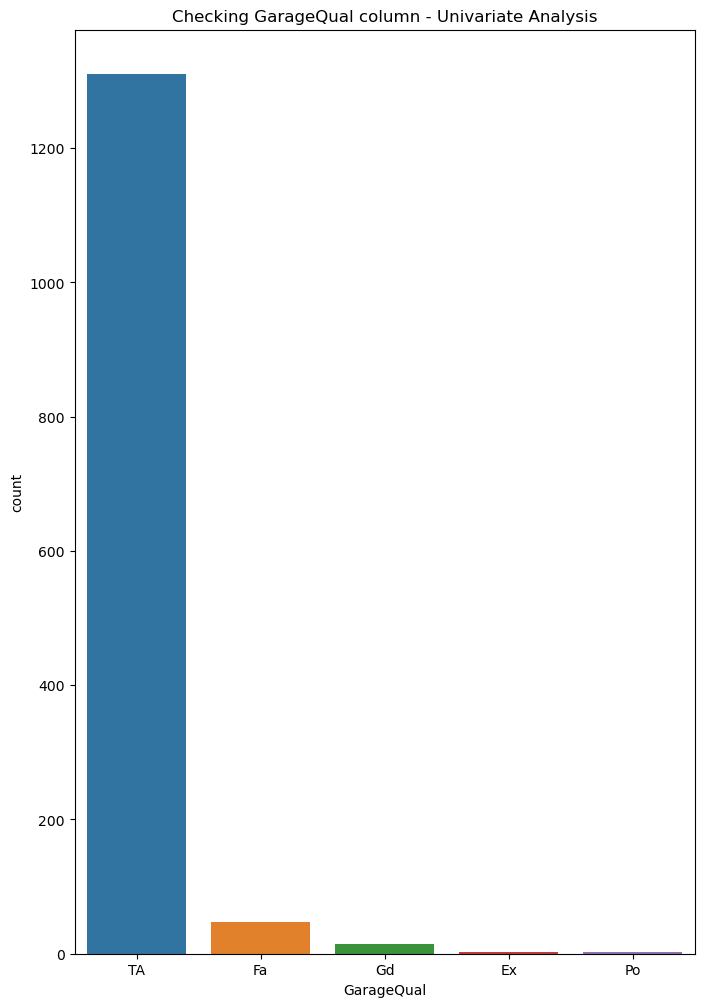

In [64]:
#data imputation for column 'GarageQual'
plt.figure(figsize=(8,12))
sns.countplot(x=housing_cleaned['GarageQual'])
plt.title("Checking GarageQual column - Univariate Analysis")
plt.show()

In [65]:
housing_cleaned.GarageQual.value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

In [66]:
# most of the values are TA, so we can map the NAN values of 'GarageQual' to TA -MODE
housing_cleaned['GarageQual'] = housing_cleaned['GarageQual'].replace(np.nan,'TA')

In [67]:
housing_cleaned['GarageQual'].dtype

dtype('O')

In [68]:
housing_cleaned.GarageQual.value_counts()

TA    1392
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

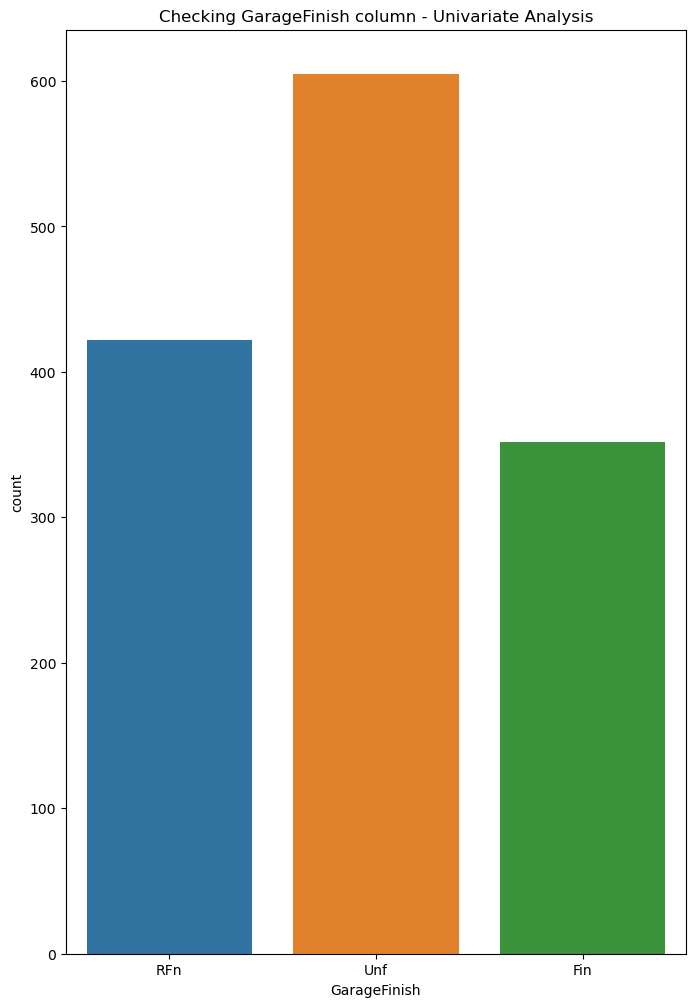

In [69]:
#data imputation for column 'GarageFinish'
plt.figure(figsize = (8,12))
sns.countplot(x=housing_cleaned.GarageFinish)
plt.title("Checking GarageFinish column - Univariate Analysis")
plt.show()

In [70]:
housing_cleaned.GarageFinish.value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [71]:
#as all the values are almost evenly distributed it would not be right to replace null with mode. So
#creating a new category name unknown
housing_cleaned['GarageFinish'] = housing_cleaned['GarageFinish'].replace(np.nan,'Unknown')

In [72]:
housing_cleaned.GarageFinish.value_counts()

Unf        605
RFn        422
Fin        352
Unknown     81
Name: GarageFinish, dtype: int64

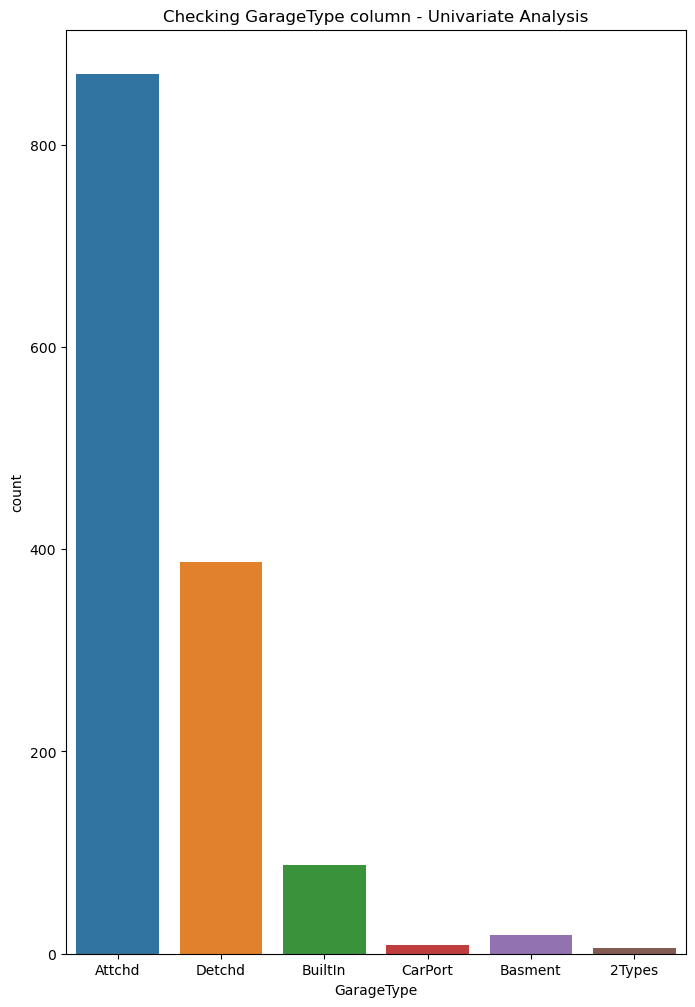

In [73]:
#data imputation for column 'GarageType'
plt.figure(figsize = (8,12))
sns.countplot(x=housing_cleaned.GarageType)
plt.title("Checking GarageType column - Univariate Analysis")
plt.show()

In [74]:
housing_cleaned.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [75]:
#most of the values are ATTCHD , so we map NAN values of 'GarageType' to ATTCHD
housing_cleaned['GarageType'] = housing_cleaned['GarageType'].replace(np.nan,'Attchd')

In [76]:
housing_cleaned.GarageType.value_counts()

Attchd     951
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

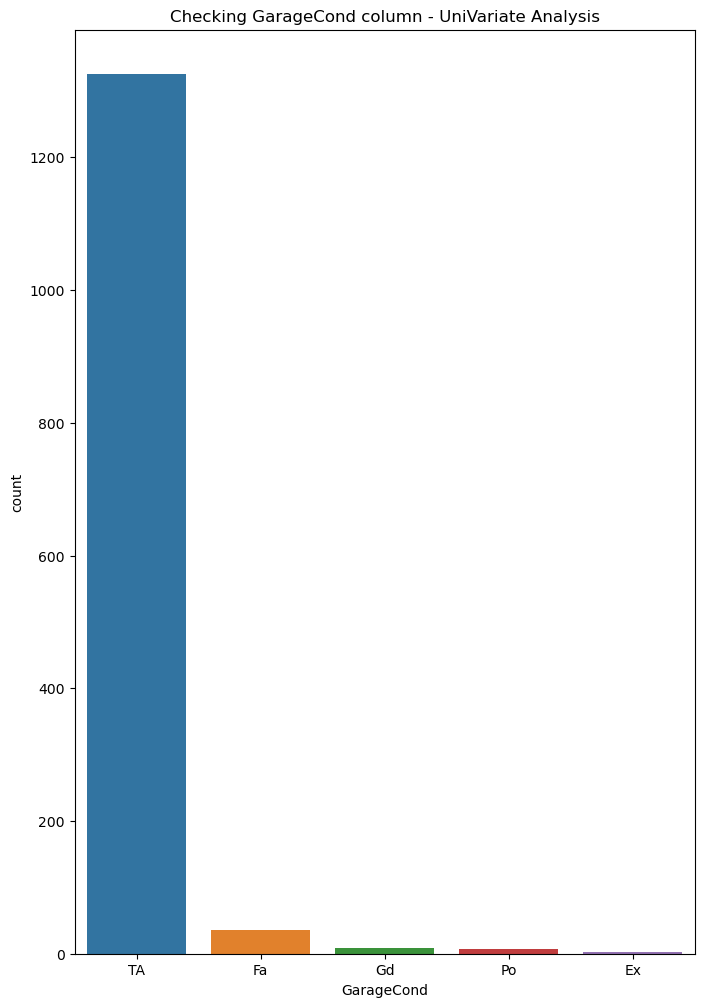

In [77]:
#data imputation for column 'GarageCond'

plt.figure(figsize=(8,12))
sns.countplot(x=housing_cleaned.GarageCond)
plt.title("Checking GarageCond column - UniVariate Analysis")
plt.show()

In [78]:
housing_cleaned.GarageCond.value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [79]:
#Most of the values is TA, so we map NAN values of 'GarageCond' to TA
housing_cleaned['GarageCond'] = housing_cleaned['GarageCond'].replace(np.nan,'TA')

In [80]:
housing_cleaned.GarageCond.value_counts()

TA    1407
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

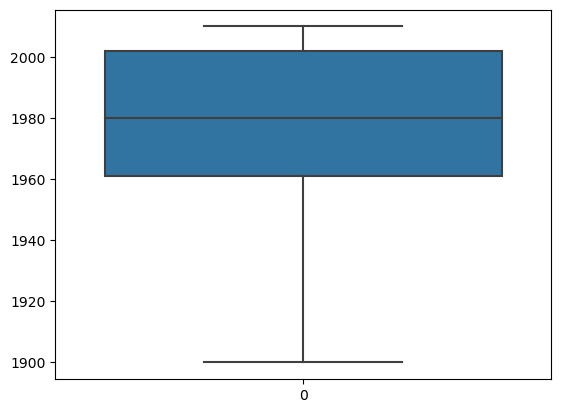

In [81]:
#plots to identify outlier analysis of GarageYrBlt
sns.boxplot(housing_cleaned.GarageYrBlt)
plt.show()

In [82]:
#there are no outliers so imputing missing values with mean
housing_cleaned['GarageYrBlt'].fillna(housing_cleaned['GarageYrBlt'].mean(),inplace = True)

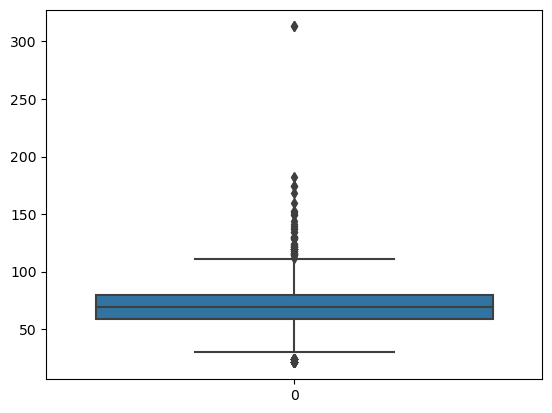

In [83]:
#plots to identify outlier analysis of LotFrontage
sns.boxplot(housing_cleaned.LotFrontage)
plt.show()

In [84]:
#there are outliers imputing with median
housing_cleaned['LotFrontage'].fillna(housing_cleaned['LotFrontage'].median(),inplace = True)

In [85]:
#as the other columns have less than 3% of NAN values we chose to drop those rows
housing_cleaned.dropna(inplace=True)

In [86]:
#final check for missing values
Total_Missing = housing_cleaned.isnull().sum().sort_values(ascending=False)
Total_Missing_Perc = (100*housing_cleaned.isnull().sum()/housing_cleaned.shape[0]).sort_values(ascending = False)                
Missing_Values = pd.concat([Total_Missing,Total_Missing_Perc], axis=1, keys=['Total_Missing', 'Percent_Missing_Values'])
Missing_Values.values

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [87]:
housing_cleaned.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

There are four columns which gives us details about the years of the construction. Deriving a new column Age of building and dropping the other columns. We take the remodel date because if the house is remodel it means they have made it better so it would not be right to take original date of built.

In [88]:
housing_cleaned['Age'] = housing_cleaned['YrSold']-housing_cleaned['YearRemodAdd']
housing_cleaned['Age'].head()

0     5
1    31
2     6
3    36
4     8
Name: Age, dtype: int64

In [89]:
housing_cleaned  = housing_cleaned.drop(['YrSold','MoSold','YearBuilt','YearRemodAdd'],axis = 1)

In [90]:
housing_cleaned.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,SalePrice,Age
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,WD,Normal,208500,5
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,WD,Normal,181500,31
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,WD,Normal,223500,6
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,WD,Abnorml,140000,36
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,WD,Normal,250000,8


In [91]:
#dropping Id column as it does not give any information
housing_cleaned = housing_cleaned.drop(['Id'], axis = 1)

In [102]:
#identifying numerical columns in the data set
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = housing_cleaned.select_dtypes(include=numerics).columns
numerical_columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'Age'],
      dtype='object')

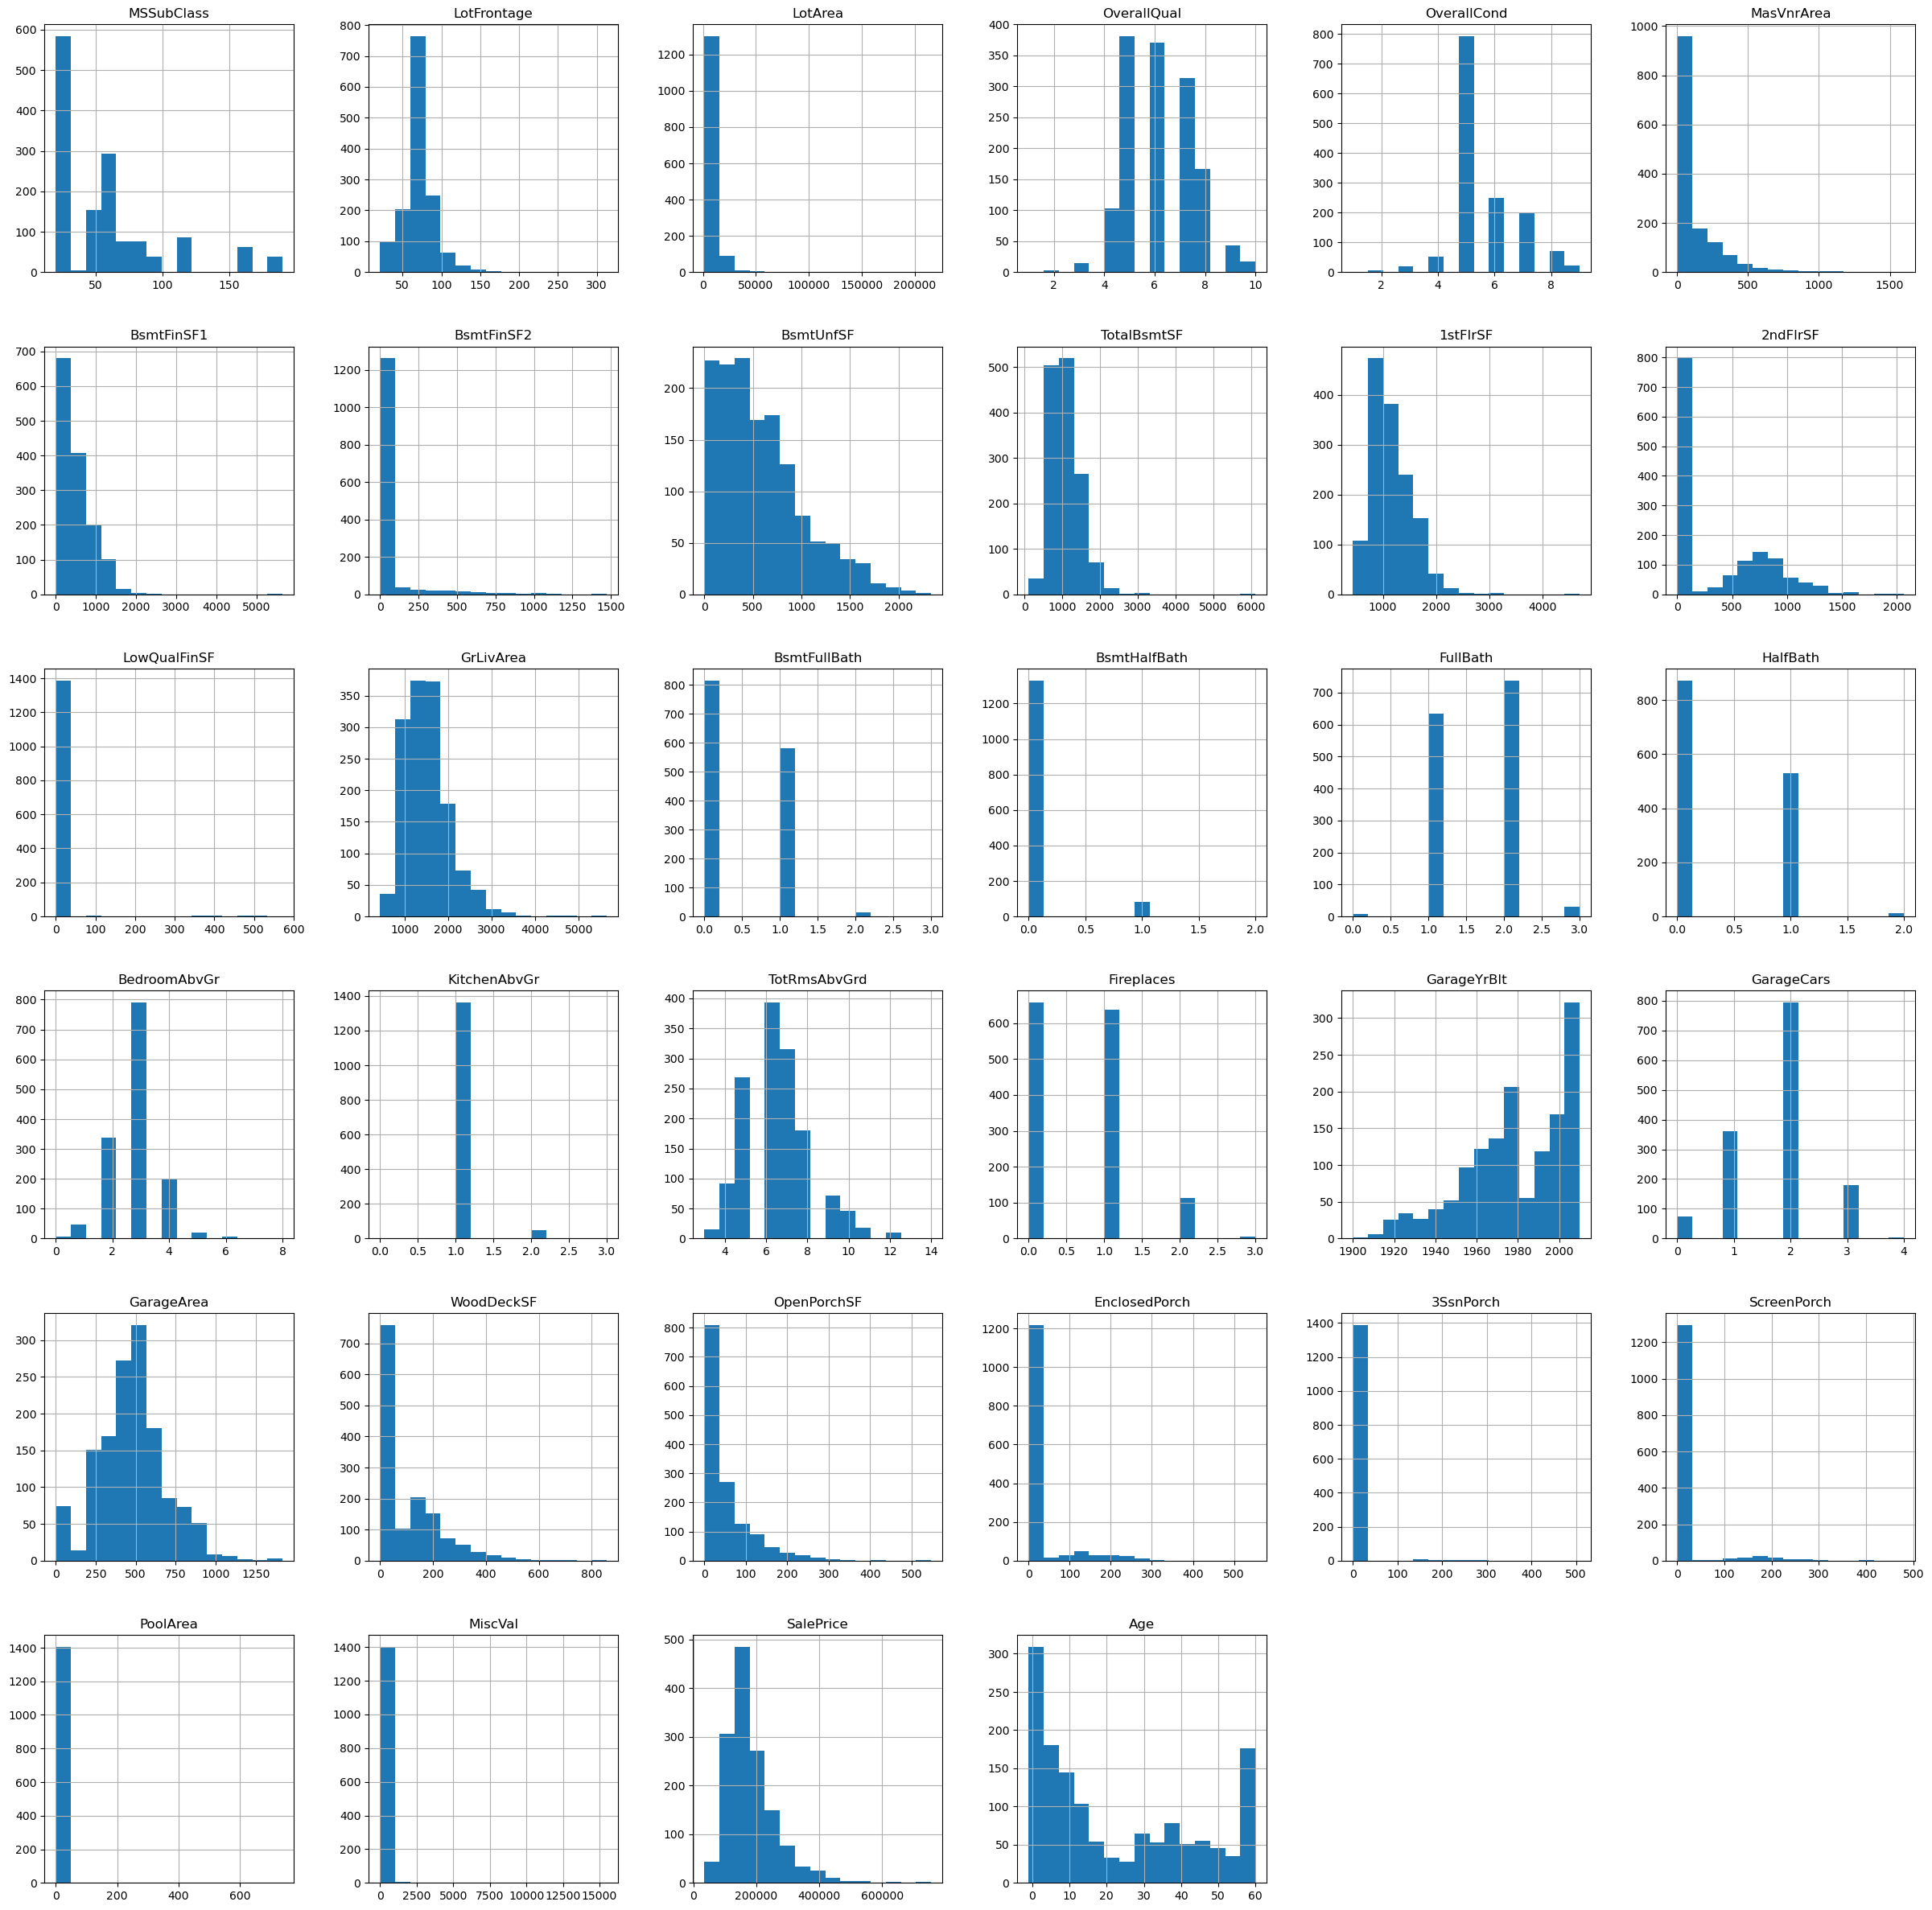

In [103]:
housing_cleaned[numerical_columns].hist(bins=15,figsize=(30,30))
plt.show()

We can observe from the histogram that there are few variables highly skewed and there might be possibility that they can be correlated with each other.

In [104]:
#correlation matrix
corr = housing_cleaned.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,Age
MSSubClass,1.000000,-0.359784,-0.138298,0.038952,-0.063240,0.023024,-0.067783,-0.064875,-0.139572,-0.253332,...,-0.094523,-0.014568,-0.005684,-0.016768,-0.041226,-0.026202,0.008496,-0.022705,-0.082281,-0.045620
LotFrontage,-0.359784,1.000000,0.303055,0.232893,-0.055121,0.179106,0.214046,0.040468,0.118356,0.385093,...,0.324805,0.073858,0.133934,0.012227,0.064597,0.036986,0.181510,-0.000569,0.333348,-0.078883
LotArea,-0.138298,0.303055,1.000000,0.104763,-0.002941,0.104010,0.213450,0.111381,-0.008757,0.275637,...,0.180207,0.172281,0.083860,-0.022978,0.021153,0.042818,0.077814,0.041567,0.264803,-0.011599
OverallQual,0.038952,0.232893,0.104763,1.000000,-0.121155,0.409656,0.211652,-0.072897,0.278239,0.509473,...,0.561612,0.230274,0.297678,-0.122678,0.032014,0.059290,0.065474,-0.025344,0.786765,-0.541616
OverallCond,-0.063240,-0.055121,-0.002941,-0.121155,1.000000,-0.134961,-0.057034,0.036885,-0.159769,-0.221992,...,-0.163341,-0.013206,-0.041823,0.075663,0.022557,0.050897,-0.003298,0.070685,-0.093567,-0.054196
MasVnrArea,0.023024,0.179106,0.104010,0.409656,-0.134961,1.000000,0.259291,-0.077978,0.103094,0.371677,...,0.370982,0.157566,0.124018,-0.116271,0.018240,0.059422,0.011161,-0.027143,0.474525,-0.172425
BsmtFinSF1,-0.067783,0.214046,0.213450,0.211652,-0.057034,0.259291,1.000000,-0.060807,-0.551475,0.504307,...,0.288913,0.196236,0.098352,-0.109122,0.028958,0.057169,0.141557,0.009120,0.368849,-0.109209
BsmtFinSF2,-0.064875,0.040468,0.111381,-0.072897,0.036885,-0.077978,-0.060807,1.000000,-0.229907,0.086766,...,-0.025604,0.065614,0.002020,0.037693,-0.030142,0.087231,0.041342,0.006542,-0.020196,0.078440
BsmtUnfSF,-0.139572,0.118356,-0.008757,0.278239,-0.159769,0.103094,-0.551475,-0.229907,1.000000,0.367804,...,0.170188,-0.022720,0.118343,-0.003900,0.023565,-0.021628,-0.038245,-0.017937,0.188959,-0.161609
TotalBsmtSF,-0.253332,0.385093,0.275637,0.509473,-0.221992,0.371677,0.504307,0.086766,0.367804,1.000000,...,0.498678,0.222698,0.239398,-0.111764,0.045885,0.076152,0.134601,-0.006489,0.611084,-0.265902


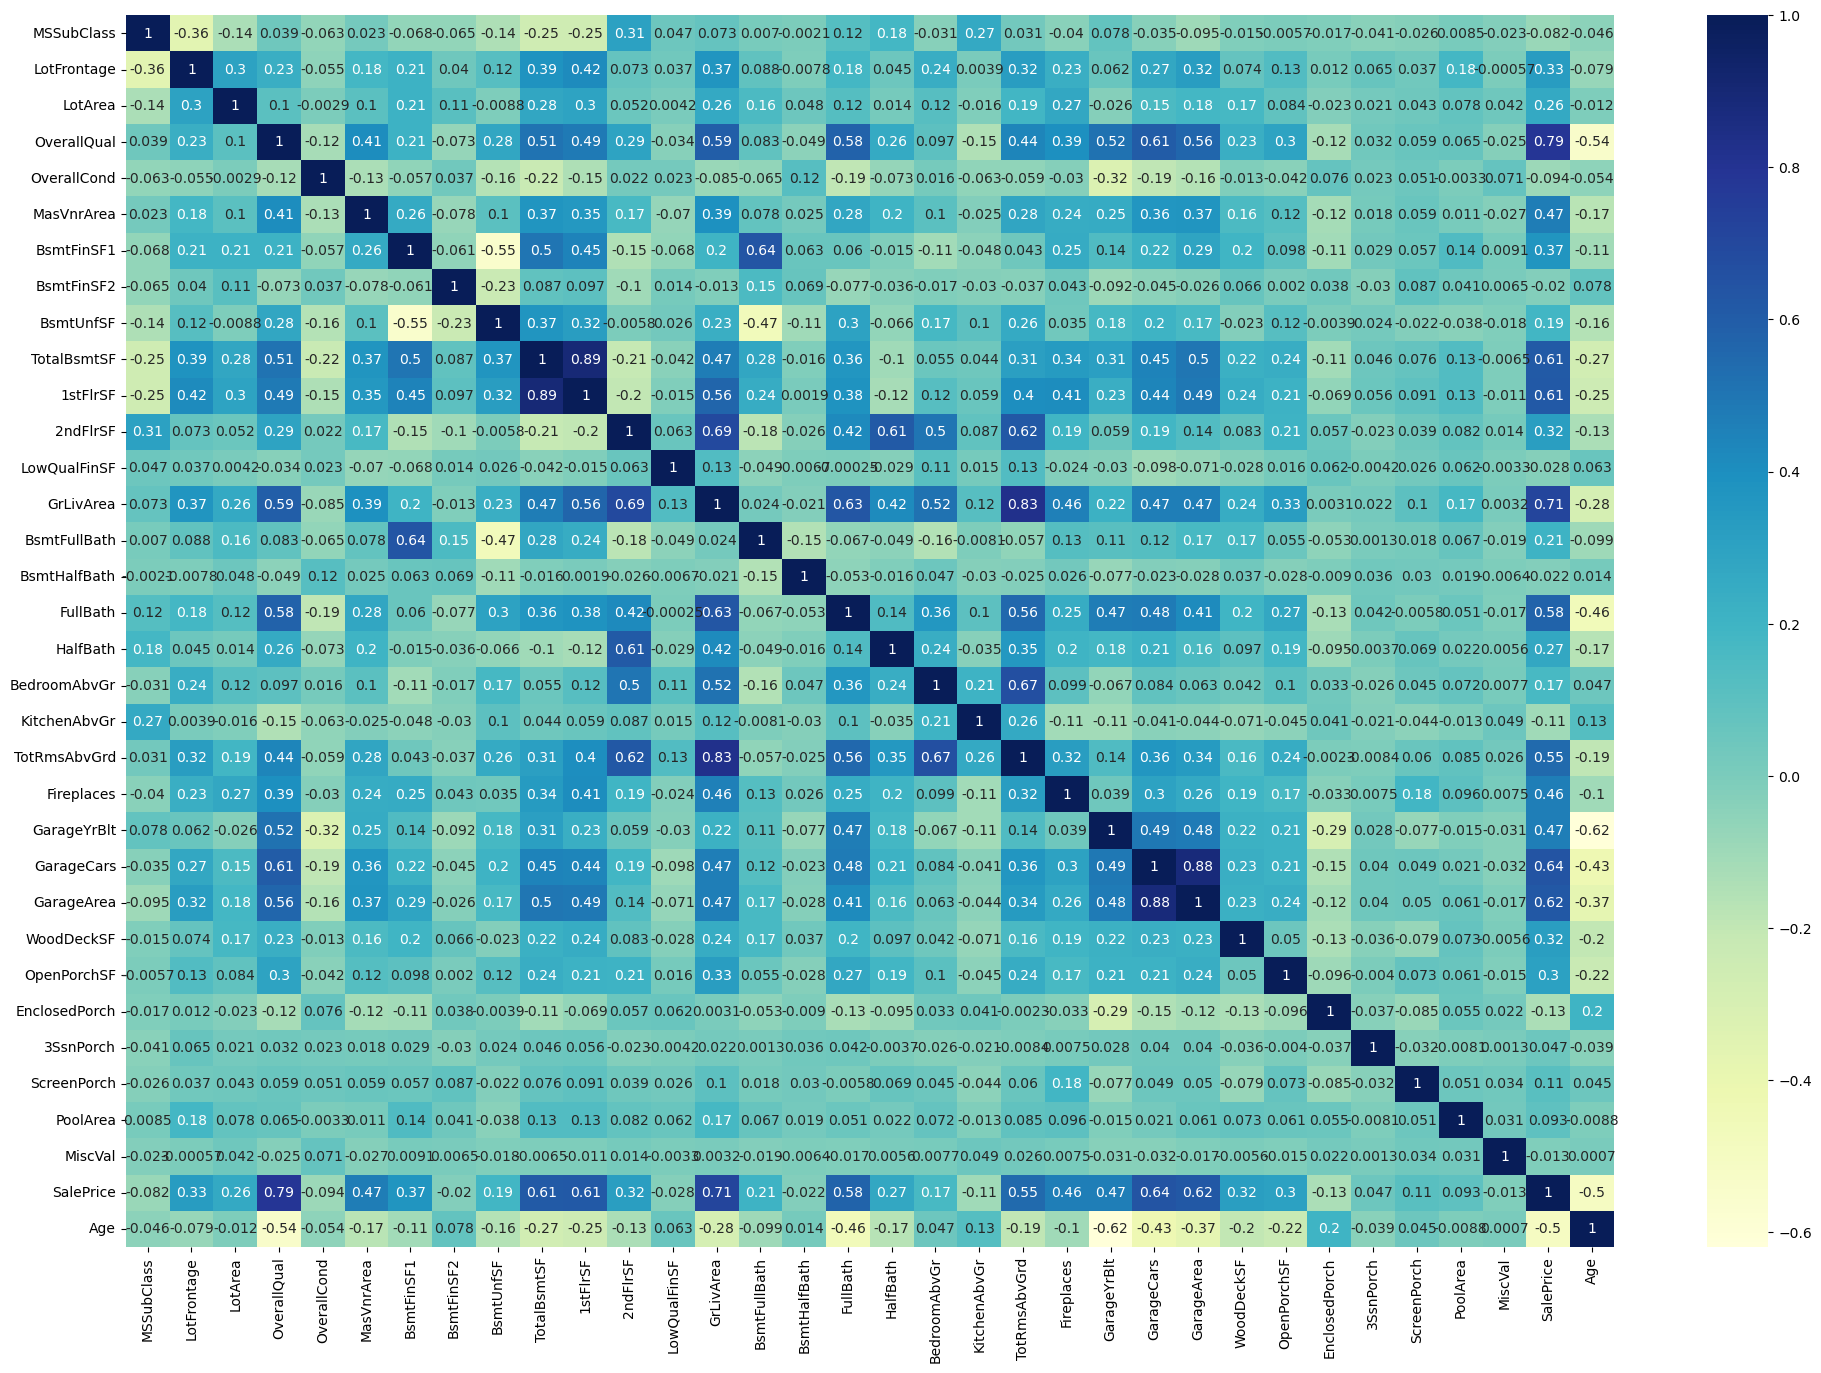

In [105]:
#plotting correlation on a heatmap
plt.figure(figsize=(24,16))
sns.heatmap(corr,cmap='YlGnBu',annot=True)
plt.show()

Based on the correlation we can make the following interpretions,
- SalePrice is Negatively Correlated to Age
- SalePrice is Positively Correlated to GarageArea
- SalePrice is Positively Correlated to GarageCars
- SalePrice is Positively Correlated to TotRmsAbvGrd
- SalePrice is Positively Correlated to FullBath
- SalePrice is Positively Correlated to GrLivArea
- SalePrice is Positively Correlated to TotalBsmtSF
- SalePrice is Positively Correlated to 1stFlrSF
- SalePrice is Positively Correlated to OverallQual

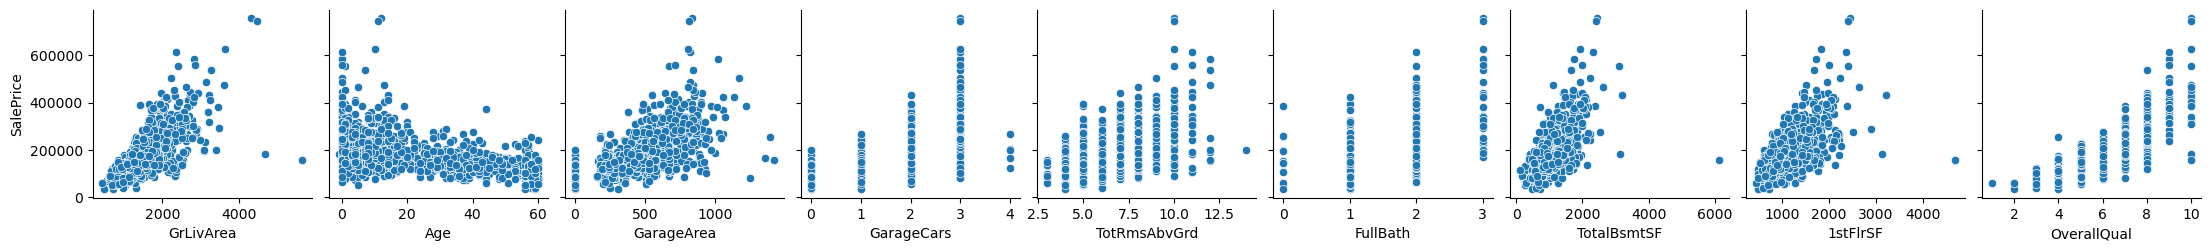

In [108]:
#bivariate analysis of these top 9 correlated variables with saleprice using pairplots
sns.pairplot(data = housing_cleaned, x_vars = ['GrLivArea','Age','GarageArea','GarageCars','TotRmsAbvGrd','FullBath','TotalBsmtSF','1stFlrSF','OverallQual']
             ,y_vars=['SalePrice'])
plt.show()

- We see that most of the variables are linearly correlated to SalePrice so there is a scope of doing linear regression model
- We even observe that some variables like FullBath, GarageCards are not continuously distributed so we can encode them according to their characteristics

In [109]:
cat_columns = housing_cleaned.select_dtypes(include='object').columns
cat_columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

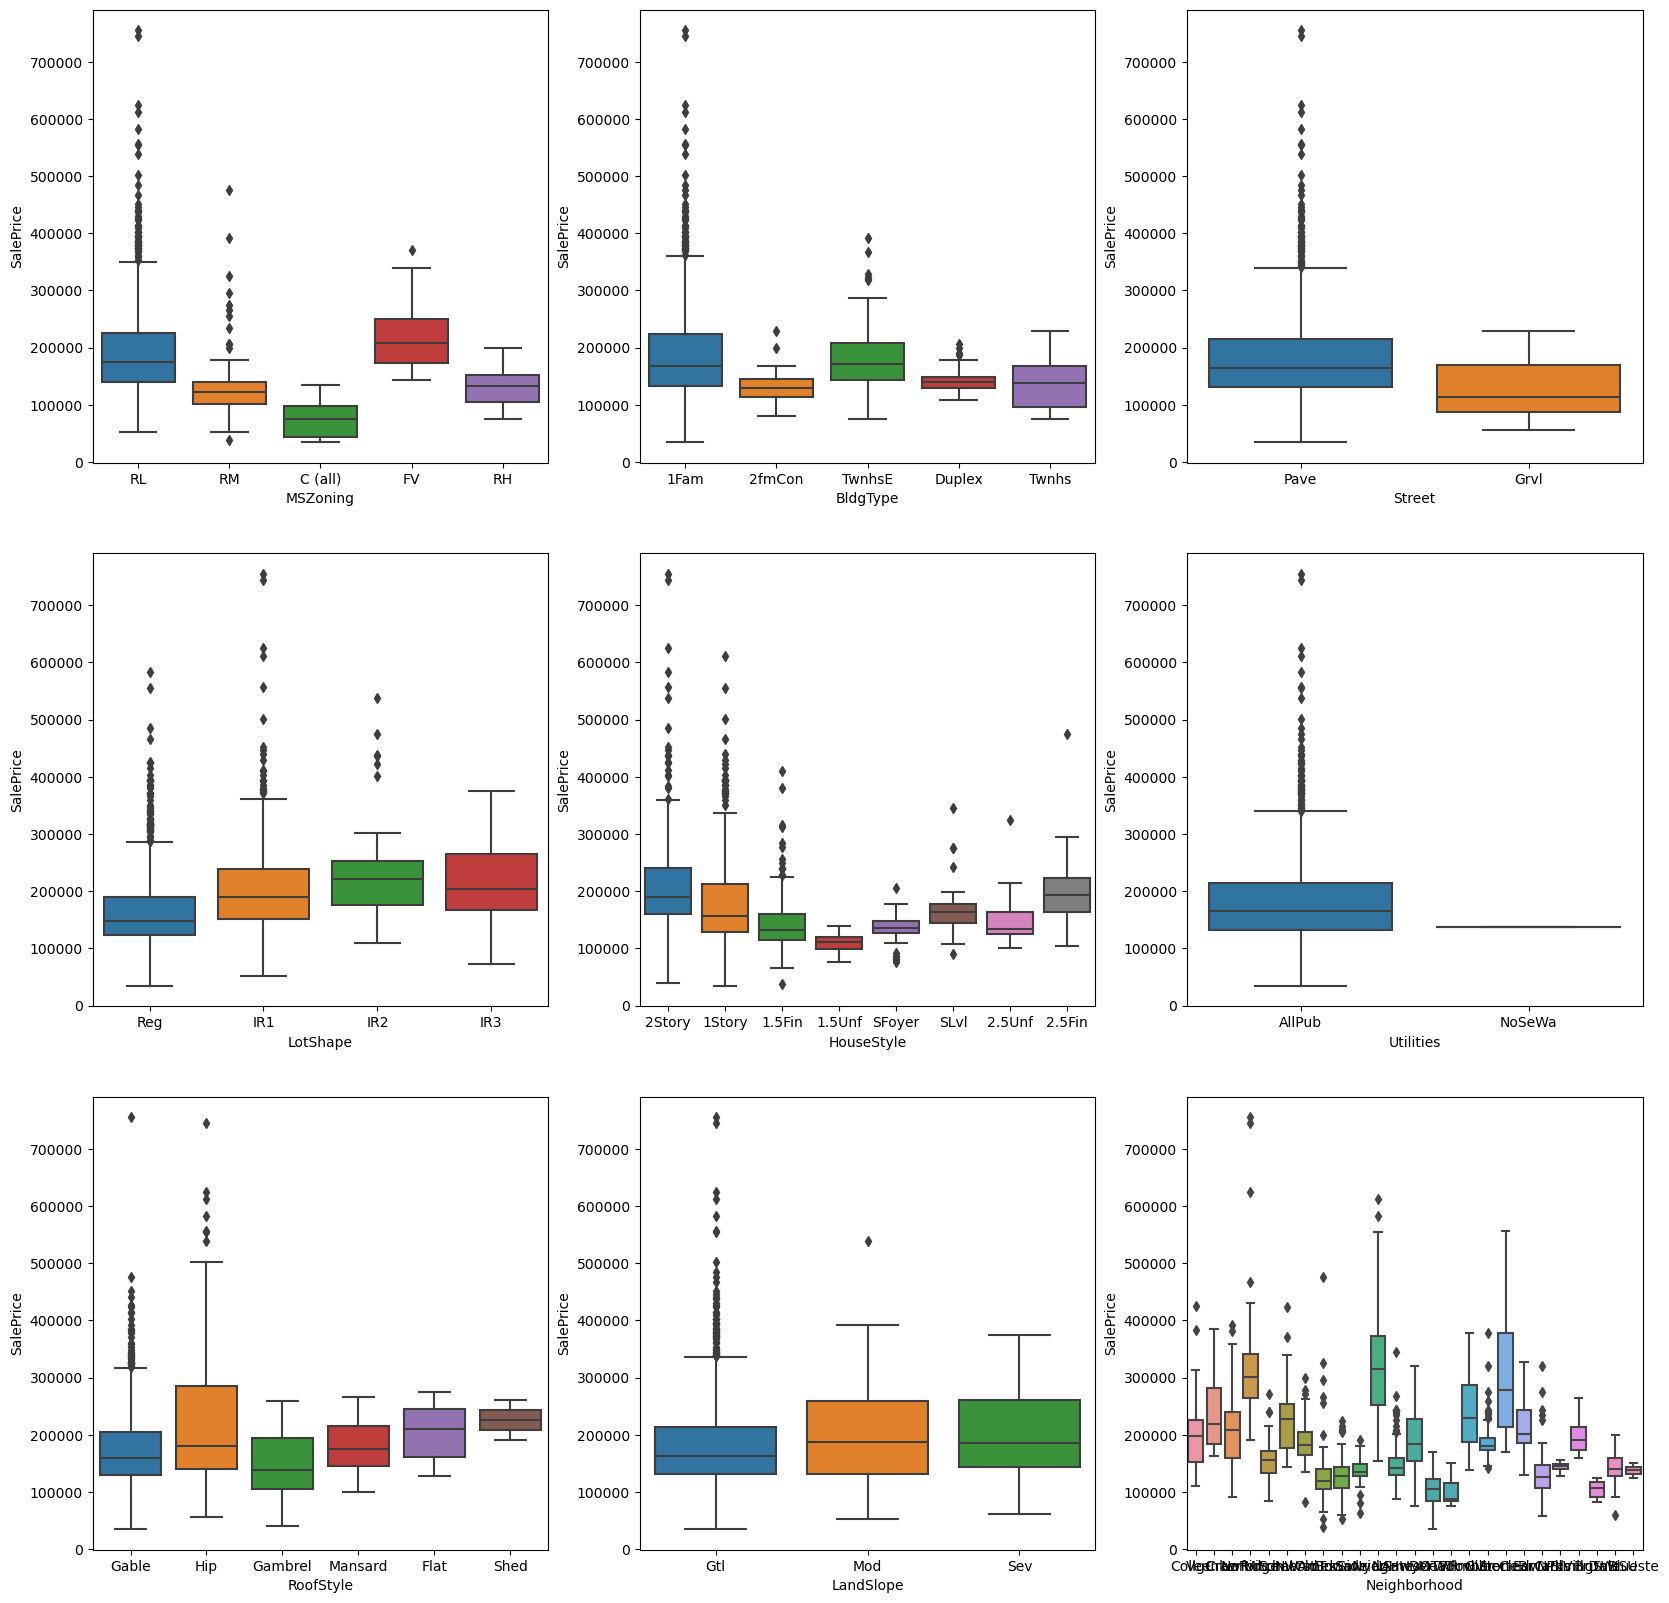

In [114]:
#EDA for few categorical columns which might be useful for predicting the sale price
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.boxplot(x='MSZoning',y='SalePrice',data=housing_cleaned)
plt.subplot(3,3,2)
sns.boxplot(x='BldgType',y='SalePrice',data=housing_cleaned)
plt.subplot(3,3,3)
sns.boxplot(x='Street',y='SalePrice',data=housing_cleaned)
plt.subplot(3,3,4)
sns.boxplot(x='LotShape',y='SalePrice',data=housing_cleaned)
plt.subplot(3,3,5)
sns.boxplot(x='HouseStyle',y='SalePrice',data=housing_cleaned)
plt.subplot(3,3,6)
sns.boxplot(x='Utilities',y='SalePrice',data=housing_cleaned)
plt.subplot(3,3,7)
sns.boxplot(x='RoofStyle',y='SalePrice',data=housing_cleaned)
plt.subplot(3,3,8)
sns.boxplot(x='LandSlope',y='SalePrice',data=housing_cleaned)
plt.subplot(3,3,9)
sns.boxplot(x='Neighborhood',y='SalePrice',data=housing_cleaned)
plt.show()

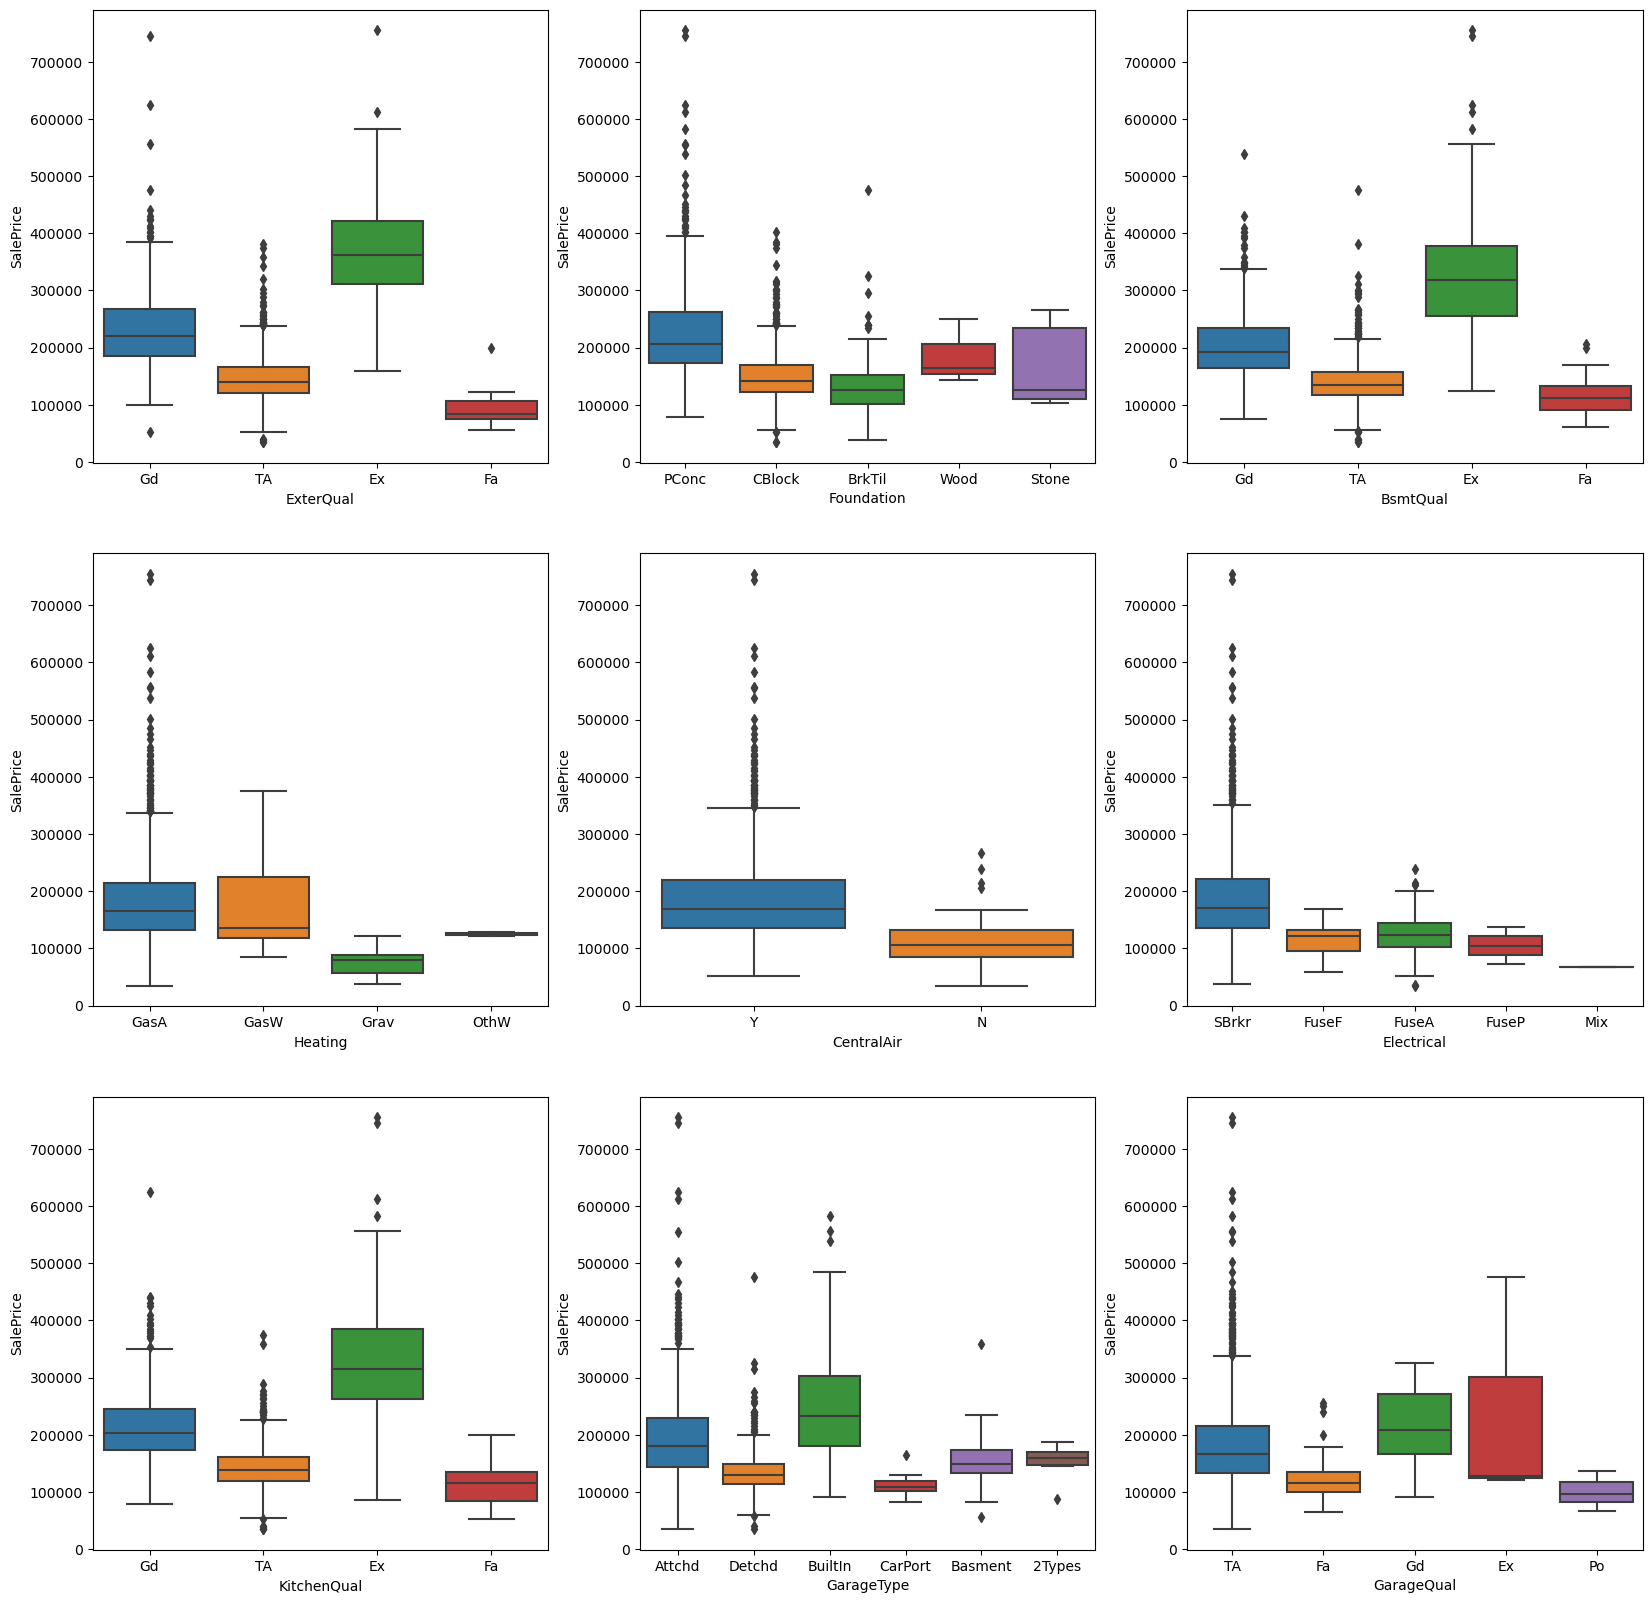

In [115]:
plt.figure(figsize = (20,20))
plt.subplot(3,3,1)
sns.boxplot(x='ExterQual',y='SalePrice',data=housing_cleaned)
plt.subplot(3,3,2)
sns.boxplot(x='Foundation',y='SalePrice',data=housing_cleaned)
plt.subplot(3,3,3)
sns.boxplot(x='BsmtQual',y='SalePrice',data=housing_cleaned)
plt.subplot(3,3,4)
sns.boxplot(x='Heating',y='SalePrice',data=housing_cleaned)
plt.subplot(3,3,5)
sns.boxplot(x='CentralAir',y='SalePrice',data=housing_cleaned)
plt.subplot(3,3,6)
sns.boxplot(x='Electrical',y='SalePrice',data=housing_cleaned)
plt.subplot(3,3,7)
sns.boxplot(x='KitchenQual',y='SalePrice',data=housing_cleaned)
plt.subplot(3,3,8)
sns.boxplot(x='GarageType',y='SalePrice',data=housing_cleaned)
plt.subplot(3,3,9)
sns.boxplot(x='GarageQual',y='SalePrice',data=housing_cleaned)
plt.show()

- MsZoning with of type 'Fv' has high Saleprice and type 'C' has least sale price
- The Street of type 'Pave' has high SalePrice when compared to 'Grvl'
- the Utlities columns have most of its values as 'AllPub' there is no much informmation - Its not an important feature
- The house with Exterior Quality of type Excellent has the highest SalePrice
- The house with Basement Quality of type Excellent has the highest SalePrice
- The house with Kitchen Quality of type Excellent has the highest SalePrice
- The house with Garage Quality of type Excellent has the highest SalePrice
- The house with Garage Type of type BuiltIn has the highest SalePrice
- The house with Sale Type of type New has the highest SalePrice.
- The Central air of type 'Yes' has more SalePrice when compared to 'No'

In [116]:
housing_cleaned['SalePrice'].describe()

count      1412.000000
mean     182507.021955
std       79270.416057
min       34900.000000
25%      131475.000000
50%      164600.000000
75%      215000.000000
max      755000.000000
Name: SalePrice, dtype: float64

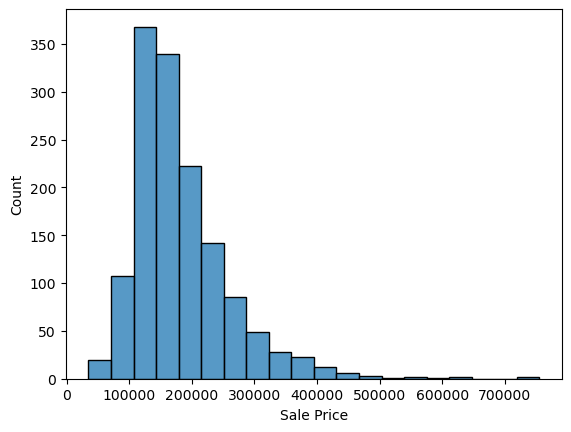

In [121]:
#we are checking the distribution in SalePrice
sns.histplot(housing_cleaned['SalePrice']
           ,bins=20).set(xlabel='Sale Price', ylabel='Count')
plt.show()


 mu = 182507.02 and sigma = 79242.34



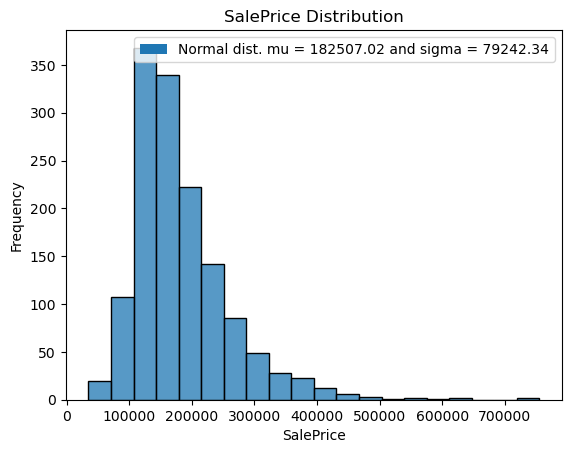

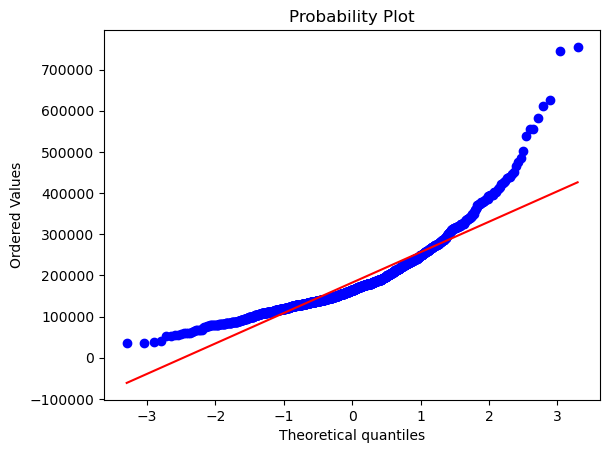

In [125]:
sns.histplot(housing_cleaned['SalePrice'],bins=20)
(mu,sigma) = norm.fit(housing_cleaned['SalePrice'])
print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu,sigma))
plt.legend(['Normal dist. mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma)],loc="best")
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')
fig = plt.figure()
res = stats.probplot(housing_cleaned['SalePrice'],plot=plt)
plt.show()      

The target variable is right skewed, we need to transform this variable and make it normally distributed, we can using log transformation


 mu = 12.03 and sigma = 0.39



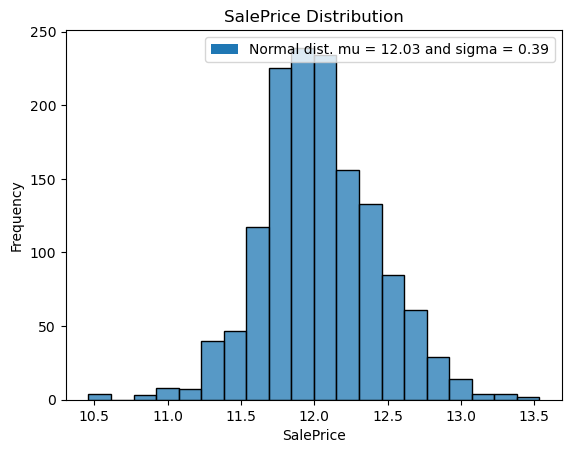

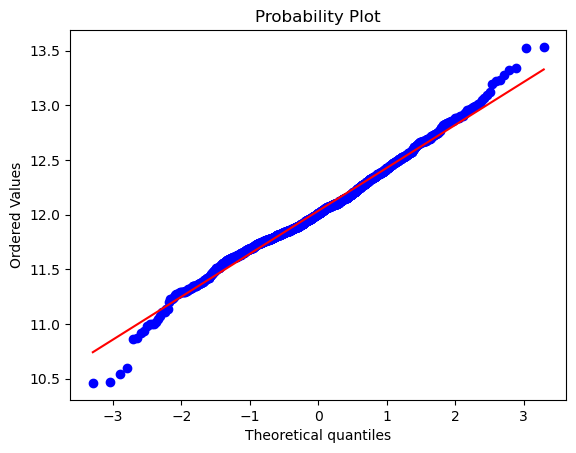

In [126]:
housing_cleaned['SalePrice'] = np.log(housing_cleaned['SalePrice'])
sns.histplot(housing_cleaned['SalePrice'],bins=20)
(mu,sigma) = norm.fit(housing_cleaned['SalePrice'])
print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu,sigma))
plt.legend(['Normal dist. mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma)],loc="best")
plt.ylabel('Frequency')
plt.title('SalePrice Distribution')
fig = plt.figure()
res = stats.probplot(housing_cleaned['SalePrice'],plot=plt)
plt.show()  

In [127]:
def map_function(x):
    return x.map({'Ex':5,'Gd':4,'TA':3,'Fa':2,'Po':1,'Na':0})
def map_function1(x):
    return x.map({'Gd':4,'Av':3,'Mn':2,'No':1,'Na':0})
def map_function2(x):
    return x.map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'NA':0})
def map_function3(x):
    return x.map({'Y':1,'N':0})
def map_function4(x):
    return x.map({'Typ':8,'Min1':7,'Min2':6,'Mod':5,'Maj1':4,'Maj2':3,'Sev':2,'Sal':1})
def map_function5(x):
    return x.map({'Fin':3,'RFn':2,'Unf':1,'NA':0,'Unknown':0})
def map_function6(x):
    return x.map({'Y':2,'P':2,'N':0})

housing_cleaned['ExterQual'] = housing_cleaned[['ExterQual']].apply(map_function)
housing_cleaned['ExterCond'] = housing_cleaned[['ExterCond']].apply(map_function)
housing_cleaned['BsmtQual'] = housing_cleaned[['BsmtQual']].apply(map_function)
housing_cleaned['BsmtCond'] = housing_cleaned[['BsmtCond']].apply(map_function)
housing_cleaned['BsmtExposure'] = housing_cleaned[['BsmtExposure']].apply(map_function1)
housing_cleaned['BsmtFinType1'] = housing_cleaned[['BsmtFinType1']].apply(map_function2)
housing_cleaned['BsmtFinType2'] = housing_cleaned[['BsmtFinType2']].apply(map_function2)
housing_cleaned['HeatingQC'] = housing_cleaned[['HeatingQC']].apply(map_function)
housing_cleaned['CentralAir'] = housing_cleaned[['CentralAir']].apply(map_function3)
housing_cleaned['KitchenQual'] = housing_cleaned[['KitchenQual']].apply(map_function)
housing_cleaned['Functional'] = housing_cleaned[['Functional']].apply(map_function4)
housing_cleaned['GarageFinish'] = housing_cleaned[['GarageFinish']].apply(map_function5)
housing_cleaned['GarageQual'] = housing_cleaned[['GarageQual']].apply(map_function)
housing_cleaned['GarageCond'] = housing_cleaned[['GarageCond']].apply(map_function)
housing_cleaned['PavedDrive'] = housing_cleaned[['PavedDrive']].apply(map_function6)

In [128]:
housing_cleaned['MSSubClass'] = housing_cleaned['MSSubClass'].astype('object')

In [129]:
cat_columns = housing_cleaned.select_dtypes(include='object').columns
cat_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'SaleType', 'SaleCondition'],
      dtype='object')

In [130]:
Total_Missing = housing_cleaned.isnull().sum().sort_values(ascending=False)
Total_Missing_Perc = (100*housing_cleaned.isnull().sum()/housing_cleaned.shape[0]).sort_values(ascending = False)                
Missing_Values = pd.concat([Total_Missing,Total_Missing_Perc], axis=1, keys=['Total_Missing', 'Percent_Missing_Values'])
Missing_Values.values

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [131]:
#creating dummies
dummy = pd.get_dummies(housing_cleaned[cat_columns],drop_first=True)
dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [132]:
#adding the results back to the cleaned dataframe
housing_cleaned = pd.concat([housing_cleaned,dummy],axis = 1)
housing_cleaned.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,1,0,0,0,1,0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,1,0,0,0,0,0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,1,0,0,0,1,0


In [134]:
#dropping the columns whose dummies have been created
housing_cleaned = housing_cleaned.drop(housing_cleaned[cat_columns],axis=1)
housing_cleaned.shape

(1412, 202)

In [135]:
Total_Missing = housing_cleaned.isnull().sum().sort_values(ascending=False)
Total_Missing_Perc = (100*housing_cleaned.isnull().sum()/housing_cleaned.shape[0]).sort_values(ascending = False)                
Missing_Values = pd.concat([Total_Missing,Total_Missing_Perc], axis=1, keys=['Total_Missing', 'Percent_Missing_Values'])
Missing_Values.values

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.

In [136]:
np.random.seed(0)
house_train,house_test = train_test_split(housing_cleaned,train_size=0.7,random_state=100)
print(house_train.shape)
print(house_test.shape)

(988, 202)
(424, 202)


In [137]:
#displaying the first five rows of train dataframe
house_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,68.0,50271,9,5,0.0,4,3,5,3,4,...,0,0,0,0,1,0,0,0,1,0
211,83.0,10420,6,5,0.0,3,3,4,3,2,...,0,0,0,0,1,0,0,0,1,0
550,53.0,4043,6,6,0.0,3,3,4,3,1,...,0,0,0,0,0,0,0,0,0,0
640,62.0,12677,8,5,472.0,5,3,5,3,4,...,0,0,0,0,1,0,0,0,1,0
1113,66.0,8923,5,7,0.0,3,3,3,3,1,...,0,0,0,0,1,0,0,0,1,0


In [138]:
#displaying the first five rows of test dataframe
house_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
357,44.0,4224,5,5,0.0,3,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
512,70.0,9100,5,5,0.0,3,3,3,3,1,...,0,0,0,0,1,0,0,0,1,0
548,49.0,8235,5,7,0.0,3,4,3,3,1,...,0,0,0,0,1,0,0,0,1,0
546,70.0,8737,6,7,0.0,3,3,4,3,1,...,0,0,0,0,1,0,0,0,1,0
888,95.0,15865,8,6,0.0,4,4,3,4,4,...,0,0,0,0,1,0,0,0,1,0


In [140]:
y_train = house_train.pop("SalePrice")
X_train = house_train

In [141]:
y_test = house_test.pop("SalePrice")
X_test = house_test

Scaling the numerical variables

In [144]:
scaler = MinMaxScaler()
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_columns = X_train.select_dtypes(include=numerics).columns
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

In [145]:
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

In [146]:
X_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
53,0.160959,0.228895,0.888889,0.500,0.000000,0.666667,0.5,1.000000,0.666667,1.000000,...,0,0,0,0,1,0,0,0,1,0
211,0.212329,0.042628,0.555556,0.500,0.000000,0.333333,0.5,0.666667,0.666667,0.333333,...,0,0,0,0,1,0,0,0,1,0
550,0.109589,0.012821,0.555556,0.625,0.000000,0.333333,0.5,0.666667,0.666667,0.000000,...,0,0,0,0,0,0,0,0,0,0
640,0.140411,0.053177,0.777778,0.500,0.418069,1.000000,0.5,1.000000,0.666667,1.000000,...,0,0,0,0,1,0,0,0,1,0
1113,0.154110,0.035631,0.444444,0.750,0.000000,0.333333,0.5,0.333333,0.666667,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [147]:
X_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,988.000000,...,988.000000,988.000000,988.000000,988.000000,988.000000,988.0,988.000000,988.000000,988.000000,988.000000
mean,0.166602,0.042993,0.567814,0.575784,0.087242,0.463225,0.521508,0.521930,0.670715,0.224696,...,0.004049,0.004049,0.080972,0.001012,0.867409,0.0,0.007085,0.017206,0.816802,0.082996
std,0.074094,0.050616,0.150756,0.140325,0.147576,0.189495,0.089920,0.224755,0.097159,0.351106,...,0.063532,0.063532,0.272930,0.031814,0.339304,0.0,0.083916,0.130106,0.387025,0.276016
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.133562,0.028947,0.444444,0.500000,0.000000,0.333333,0.500000,0.333333,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.164384,0.038309,0.555556,0.500000,0.000000,0.333333,0.500000,0.666667,0.666667,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.198630,0.048087,0.666667,0.625000,0.139947,0.666667,0.500000,0.666667,0.666667,0.666667,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [148]:
y_train.head()

53      12.860999
211     12.133502
550     11.849398
640     12.520883
1113    11.809319
Name: SalePrice, dtype: float64

In [149]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [150]:
print(lm.coef_)
print(lm.intercept_)

[ 1.41933465e-01  5.69850994e-01  3.86585924e-01  2.21649731e-01
  3.43842885e-02  2.05046486e-02 -7.12094936e-02  2.84944516e-02
  1.31648415e-02  3.25356626e-02  2.29491484e-02  1.53471336e+10
 -2.25922486e-02  1.07927838e+10  1.71044390e+10 -2.26619172e+10
  3.63189501e-02  7.55313161e-02 -5.18964069e+09 -3.84107814e+09
 -1.06396934e+09  7.51102835e+09  8.16075662e-02  6.18843316e-03
  9.30204587e-02  6.18159500e-02 -5.57974959e-02 -1.19472984e-01
  4.51673877e-02  2.58401282e-02  1.26775558e-01  6.66087076e-02
  5.60341613e-03  2.31708120e-02  1.27722446e-01  8.80021676e-02
  2.18326831e-01 -6.52352323e-02 -7.65792195e-03  6.39169364e-02
  9.71215055e-03  1.48934772e-02  4.78398928e-02  9.19125495e-02
  9.55464533e-02 -1.17926031e-02 -4.96665455e-02 -7.33304286e-02
  2.43430573e-02 -3.32299496e-01 -1.51966902e-02 -4.25871500e-02
 -4.26975451e-02 -1.73992410e-01 -1.36596415e-01 -5.82533948e-02
  9.30233414e+09 -5.35823185e-02 -1.40144261e-01 -1.15827441e-01
 -1.27943908e-01  5.22957

In [152]:
from sklearn.feature_selection import RFE
lm = LinearRegression()
rfe = RFE(lm)
rfe.fit(X_train,y_train)
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True False False  True  True False False False  True
 False  True  True  True False  True  True  True  True  True  True False
  True  True False  True  True False  True  True False False  True  True
  True  True False  True False False False False False False  True False
 False  True False False False  True  True False  True False  True False
  True  True  True  True  True  True False False False False False False
  True False False  True False False  True False False False False False
  True  True False False  True False False False False False  True  True
 False False False False  True False  True False False False False  True
 False False False  True  True  True  True  True  True  True  True  True
 False False  True False False  True False False  True  True  True  True
  True False  True  True  True  True  True  True  True  True False  True
 False False False False False False False False False  True False  True
 False  True False False False False False False  T

In [154]:
col = X_train.columns[rfe.support_]
col

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'ExterCond',
       'BsmtQual', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenAbvGr', 'KitchenQual',
       'Functional', 'Fireplaces', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'WoodDeckSF', 'Age', 'MSSubClass_45', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_90', 'MSSubClass_160', 'MSSubClass_190',
       'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'Utilities_NoSeWa', 'LotConfig_FR3', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Condition1_RRAe', 'Condition2_Feedr',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_PosN',
       'Condition2_RRAe', 'Condi

In [155]:
#features which can be excluded to make the model according to RFE
X_train.columns[~rfe.support_]

Index(['MasVnrArea', 'ExterQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'BsmtHalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd',
       ...
       'Heating_GasW', 'Electrical_FuseF', 'Electrical_FuseP',
       'Electrical_SBrkr', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_ConLw',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Partial'],
      dtype='object', length=101)

In [156]:
#creating an X train dataframe to build the first model with features selected by RFE technique
X_train_rfe1 = X_train[col]

In [157]:
import statsmodels.api as sm
X_train_rfe1 = sm.add_constant(X_train_rfe1) #adding constant
X_train_rfe1.head()

,const,LotFrontage,LotArea,OverallQual,OverallCond,ExterCond,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
53,1.0,0.160959,0.228895,0.888889,0.500,0.5,1.000000,0.863550,0.0,0.013699,...,0,0,0,0,0,0,0,0,0,1
211,1.0,0.212329,0.042628,0.555556,0.500,0.5,0.666667,0.017176,0.0,0.503425,...,0,0,0,0,0,0,0,0,0,1
550,1.0,0.109589,0.012821,0.555556,0.625,0.5,0.666667,0.266698,0.0,0.218322,...,0,0,0,0,0,0,0,0,0,0
640,1.0,0.140411,0.053177,0.777778,0.500,0.5,1.000000,0.581107,0.0,0.128425,...,0,0,0,0,0,0,0,0,0,1
1113,1.0,0.154110,0.035631,0.444444,0.750,0.5,0.333333,0.306775,0.0,0.156250,...,0,0,0,0,0,0,0,0,0,1


In [160]:

lm1=sm.OLS(y_train,X_train_rfe1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     141.9
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:20:35   Log-Likelihood:                 880.79
No. Observations:                 988   AIC:                            -1576.
Df Residuals:                     895   BIC:                            -1120.
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    8.5532 

In [161]:
#calculating the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values,i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

,Features,VIF
0,const,0.00
1,LotFrontage,1.66
2,LotArea,2.06
3,OverallQual,4.17
4,OverallCond,2.13
...,...,...
96,SaleType_New,2.66
97,SaleType_Oth,1.03
98,SaleCondition_Alloca,1.36
99,SaleCondition_Family,1.32


The Linear Regression Model built with 90 columns selected by RFE technique had the accuracy (Adjusted R-squared) of 92.5% and the columns has VIF value of infinite which shows multicollinearity.

Though the accuracy seems good it has many features and highly collinear.

In [162]:
#deleting other columns not selected by RFE technique
X_train = X_train[col]
X_test = X_test[col]

In [163]:
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,ExterCond,BsmtQual,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,SaleType_CWD,SaleType_ConLI,SaleType_New,SaleType_Oth,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal
53,0.160959,0.228895,0.888889,0.500,0.50,1.000000,0.863550,0.0,0.013699,0.561228,...,0,0,0,0,0,0,0,0,0,1
211,0.212329,0.042628,0.555556,0.500,0.50,0.666667,0.017176,0.0,0.503425,0.357674,...,0,0,0,0,0,0,0,0,0,1
550,0.109589,0.012821,0.555556,0.625,0.50,0.666667,0.266698,0.0,0.218322,0.311470,...,0,0,0,0,0,0,0,0,0,0
640,0.140411,0.053177,0.777778,0.500,0.50,1.000000,0.581107,0.0,0.128425,0.456543,...,0,0,0,0,0,0,0,0,0,1
1113,0.154110,0.035631,0.444444,0.750,0.50,0.333333,0.306775,0.0,0.156250,0.291761,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,0.099315,0.022576,0.444444,0.625,0.50,0.333333,0.374046,0.0,0.000000,0.219386,...,0,0,0,0,0,0,0,0,0,1
55,0.270548,0.041483,0.555556,0.500,0.50,0.333333,0.233779,0.0,0.400257,0.426494,...,0,0,0,0,0,0,0,0,0,1
360,0.164384,0.029166,0.555556,0.625,0.50,0.666667,0.368798,0.0,0.049229,0.252989,...,0,0,0,0,0,0,0,0,0,1
81,0.037671,0.014957,0.555556,0.500,0.75,1.000000,0.572996,0.0,0.015411,0.365751,...,0,0,0,0,0,0,0,0,0,1


Regularization is a process used to create an optimally complex model, i.e., a model which is as simple as possible while performing well on training data. Through regularization, one tries to strike the delicate balance between keeping the model simple, yet not making it too naive to be of any use.

In [164]:
# assuming alpha is 0.001 and build a Ridge Regression model
ridge = Ridge(alpha = 0.001)
ridge.fit(X_train,y_train)
y_train_pred = ridge.predict(X_train)
print(r2_score(y_train,y_train_pred))

0.9358573420860512


Performing Cross Score Validation and using different values of alpha and finding the optimal parameter

In [166]:
params = {'alpha':[0.001,0.01,0.5,1.0,10.0,50,100,500,1000]}
ridge = Ridge()
folds = 5
model_cv = GridSearchCV(estimator=ridge,param_grid= params,
                       scoring = 'neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,verbose = 1)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.5, 1.0, 10.0, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [167]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005002,0.002527,0.003769,0.003485,0.001,{'alpha': 0.001},-0.088097,-0.083189,-0.084316,-0.073061,...,-0.082133,0.004975,4,-0.068842,-0.070464,-0.069062,-0.073415,-0.069876,-0.070332,0.001647
1,0.002415,0.000498,0.001758,0.000382,0.01,{'alpha': 0.01},-0.087864,-0.083107,-0.084302,-0.073078,...,-0.082030,0.004910,3,-0.068891,-0.070481,-0.069076,-0.073469,-0.069921,-0.070368,0.001654
2,0.002871,0.000540,0.001104,0.000098,0.5,{'alpha': 0.5},-0.085247,-0.083021,-0.083951,-0.072389,...,-0.081188,0.004581,1,-0.070736,-0.072008,-0.070643,-0.075239,-0.071604,-0.072046,0.001678
3,0.002503,0.000395,0.001612,0.000453,1.0,{'alpha': 1.0},-0.085781,-0.083868,-0.085407,-0.072096,...,-0.081792,0.005046,2,-0.072045,-0.073395,-0.072008,-0.076623,-0.072947,-0.073403,0.001695
4,0.003258,0.000702,0.001548,0.000390,10.0,{'alpha': 10.0},-0.094671,-0.093570,-0.094296,-0.075158,...,-0.089207,0.007388,5,-0.083138,-0.083518,-0.083000,-0.086982,-0.084510,-0.084230,0.001474
5,0.003122,0.000553,0.001479,0.000435,50,{'alpha': 50},-0.123302,-0.115257,-0.114082,-0.096860,...,-0.113337,0.008830,6,-0.109381,-0.109561,-0.109830,-0.112418,-0.109600,-0.110158,0.001139
6,0.003035,0.000574,0.001718,0.000395,100,{'alpha': 100},-0.142484,-0.133141,-0.133185,-0.115545,...,-0.132829,0.009388,7,-0.129544,-0.130268,-0.130357,-0.132323,-0.129012,-0.130301,0.001125
7,0.002723,0.000377,0.001925,0.000409,500,{'alpha': 500},-0.206555,-0.196136,-0.200934,-0.177157,...,-0.197563,0.010957,8,-0.194444,-0.196985,-0.195933,-0.198334,-0.195336,-0.196206,0.001347
8,0.002703,0.000403,0.001304,0.000392,1000,{'alpha': 1000},-0.239805,-0.230719,-0.233686,-0.209239,...,-0.230712,0.011322,9,-0.227604,-0.229958,-0.229508,-0.232303,-0.228699,-0.229614,0.001564


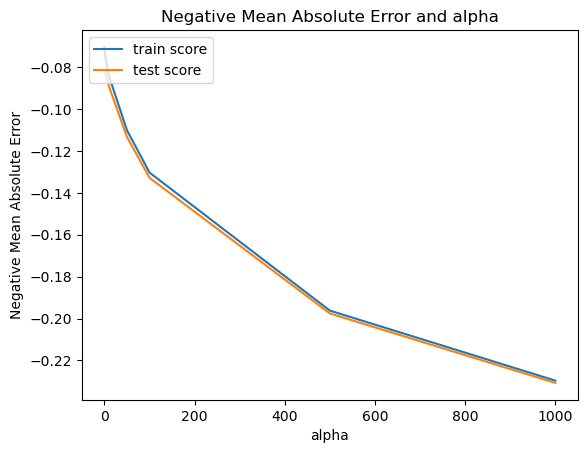

In [168]:
#plotting mean test and train scores with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We see that alpha is somewhere between 0-20 so selecting parameters according to that

In [170]:
params = {'alpha': [0.001,0.01, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [171]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010334,0.001875,0.005585,0.001552,0.001,{'alpha': 0.001},-0.088097,-0.083189,-0.084316,-0.073061,...,-0.082133,0.004975,3,-0.068842,-0.070464,-0.069062,-0.073415,-0.069876,-0.070332,0.001647
1,0.007660,0.002942,0.005835,0.002157,0.01,{'alpha': 0.01},-0.087864,-0.083107,-0.084302,-0.073078,...,-0.082030,0.004910,2,-0.068891,-0.070481,-0.069076,-0.073469,-0.069921,-0.070368,0.001654
2,0.008169,0.003016,0.003838,0.001518,1.0,{'alpha': 1.0},-0.085781,-0.083868,-0.085407,-0.072096,...,-0.081792,0.005046,1,-0.072045,-0.073395,-0.072008,-0.076623,-0.072947,-0.073403,0.001695
3,0.005230,0.001335,0.003630,0.001720,2.0,{'alpha': 2.0},-0.086435,-0.085232,-0.087177,-0.071672,...,-0.082578,0.005693,4,-0.073976,-0.075352,-0.073939,-0.078495,-0.074841,-0.075320,0.001675
4,0.003784,0.001463,0.003323,0.000742,3.0,{'alpha': 3.0},-0.087338,-0.086288,-0.088513,-0.071626,...,-0.083324,0.006146,5,-0.075505,-0.076718,-0.075458,-0.079825,-0.076366,-0.076775,0.001601
5,0.005068,0.001713,0.002516,0.000775,4.0,{'alpha': 4.0},-0.088243,-0.087429,-0.089620,-0.071764,...,-0.084096,0.006501,6,-0.076797,-0.077847,-0.076714,-0.080980,-0.077773,-0.078022,0.001553
6,0.003415,0.000974,0.001707,0.000676,5.0,{'alpha': 5.0},-0.089287,-0.088580,-0.090577,-0.072104,...,-0.084944,0.006772,7,-0.077964,-0.078872,-0.077796,-0.082072,-0.079072,-0.079155,0.001540
7,0.002702,0.000609,0.001611,0.000596,6.0,{'alpha': 6.0},-0.090438,-0.089711,-0.091443,-0.072613,...,-0.085848,0.006973,8,-0.079076,-0.079878,-0.078860,-0.083144,-0.080256,-0.080243,0.001538
8,0.002918,0.000587,0.001396,0.000486,7.0,{'alpha': 7.0},-0.091556,-0.090770,-0.092225,-0.073196,...,-0.086732,0.007122,9,-0.080140,-0.080796,-0.079928,-0.084169,-0.081396,-0.081286,0.001531
9,0.003115,0.000386,0.002008,0.000319,8.0,{'alpha': 8.0},-0.092600,-0.091779,-0.092944,-0.073856,...,-0.087587,0.007220,10,-0.081151,-0.081696,-0.080997,-0.085110,-0.082481,-0.082287,0.001504


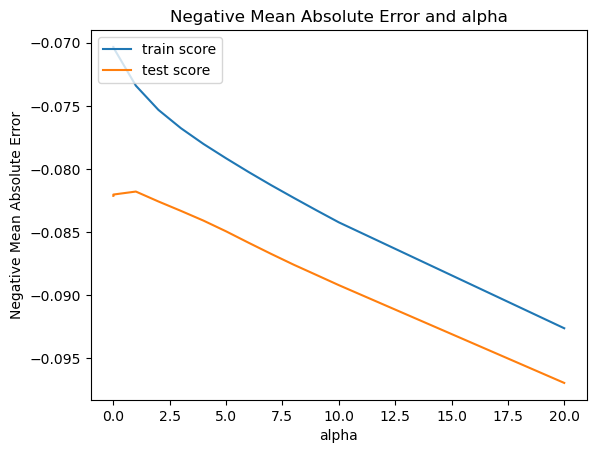

In [172]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

We see that the optimal alpha value is between 0-2

In [173]:
# Finding out the best score and Optimum value of alpha
print(model_cv.best_estimator_)
best_ridge_score = model_cv.best_score_
best_ridge_alpha = model_cv.best_params_["alpha"]

print(" The best r2 score is obtained at alpha {0}".format(best_ridge_alpha))

Ridge()
 The best r2 score is obtained at alpha 1.0


In [174]:
# Model building using optimal alpha
#ridge = Ridge(alpha=best_ridge_alpha)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

Ridge()

In [175]:
#creating coeffcients for the ridge regression
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = house_train.columns
cols.insert(0,'const')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter,(abs(ele) for ele in model_parameter))))
ridge_coef.columns = ['Features','Coefficient','Mod']

We are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the variable is negatively related to the target variable Sale price ." 
For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in relaility the variable with -0.1 is more important to predict saleprice rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price.

In [176]:
#selecting the top 10 variables
ridge_coef.sort_values(by='Mod',ascending=False).head(10)

,Features,Coefficient,Mod
0,LotFrontage,10.332194,10.332194
3,OverallCond,0.429511,0.429511
15,TotalBsmtSF,0.364379,0.364379
2,OverallQual,0.348327,0.348327
12,BsmtFinType2,0.307727,0.307727
10,BsmtFinType1,0.296675,0.296675
13,BsmtFinSF2,0.289315,0.289315
35,GarageArea,0.287883,0.287883
7,BsmtQual,0.243705,0.243705
74,LotConfig_FR2,-0.236866,0.236866


In [177]:
# Prediction using ridge regression
y_train_ridge_pred = ridge.predict(X_train)
print("Ridge regression train r2: ",round(metrics.r2_score(y_true=y_train, y_pred=y_train_ridge_pred),4))
y_test_ridge_pred = ridge.predict(X_test)
print("Ridge regression test r2: ",round(metrics.r2_score(y_true=y_test, y_pred=y_test_ridge_pred),4))

Ridge regression train r2:  0.9321
Ridge regression test r2:  0.7515


## Lasso Regression Model

In [178]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [179]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.051870,0.025530,0.002142,0.000695,0.0001,{'alpha': 0.0001},-0.084198,-0.082951,-0.083971,-0.074725,...,-0.081533,0.003507,1,-0.071346,-0.072547,-0.070917,-0.075770,-0.072252,-0.072567,0.001707
1,0.005826,0.001088,0.002710,0.001417,0.001,{'alpha': 0.001},-0.086392,-0.089580,-0.092592,-0.073635,...,-0.085551,0.006458,2,-0.080569,-0.080675,-0.080050,-0.084624,-0.081021,-0.081388,0.001648
2,0.004247,0.001789,0.002062,0.000620,0.01,{'alpha': 0.01},-0.125966,-0.123983,-0.123519,-0.103619,...,-0.119949,0.008237,3,-0.119499,-0.117580,-0.117397,-0.119347,-0.116306,-0.118026,0.001222
3,0.003623,0.000728,0.002345,0.000706,0.05,{'alpha': 0.05},-0.259663,-0.246732,-0.254338,-0.227978,...,-0.252369,0.014932,4,-0.247134,-0.251566,-0.248868,-0.250457,-0.249964,-0.249598,0.001507
4,0.002946,0.001114,0.001975,0.000566,0.1,{'alpha': 0.1},-0.314645,-0.308787,-0.306159,-0.277179,...,-0.303902,0.013686,5,-0.302052,-0.304592,-0.303821,-0.306477,-0.299013,-0.303191,0.002526


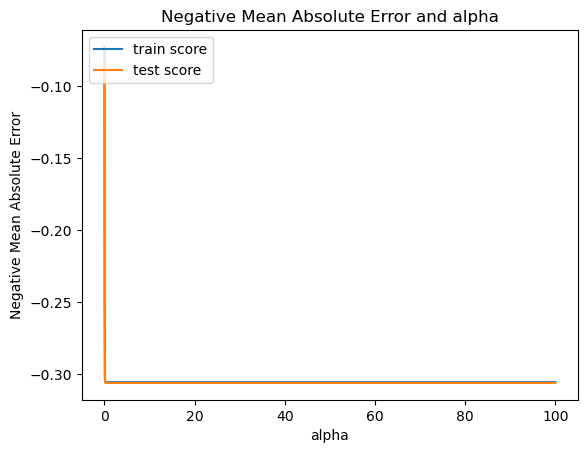

In [180]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

This graph shows that alpha value might be very less than 1

In [181]:
# list of alphas to tune
params = {'alpha': [0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [182]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009025,0.004543,0.002534,0.000765,0.001,{'alpha': 0.001},-0.086392,-0.089580,-0.092592,-0.073635,...,-0.085551,0.006458,1,-0.080569,-0.080675,-0.080050,-0.084624,-0.081021,-0.081388,0.001648
1,0.005051,0.002258,0.002232,0.000975,0.01,{'alpha': 0.01},-0.125966,-0.123983,-0.123519,-0.103619,...,-0.119949,0.008237,2,-0.119499,-0.117580,-0.117397,-0.119347,-0.116306,-0.118026,0.001222
2,0.005294,0.002547,0.003526,0.001643,0.05,{'alpha': 0.05},-0.259663,-0.246732,-0.254338,-0.227978,...,-0.252369,0.014932,3,-0.247134,-0.251566,-0.248868,-0.250457,-0.249964,-0.249598,0.001507
3,0.004446,0.002946,0.002623,0.001538,0.1,{'alpha': 0.1},-0.314645,-0.308787,-0.306159,-0.277179,...,-0.303902,0.013686,4,-0.302052,-0.304592,-0.303821,-0.306477,-0.299013,-0.303191,0.002526
4,0.003084,0.000779,0.002737,0.001364,0.2,{'alpha': 0.2},-0.315126,-0.308787,-0.308269,-0.281726,...,-0.306029,0.012572,5,-0.302534,-0.304592,-0.305862,-0.311083,-0.303274,-0.305469,0.003029


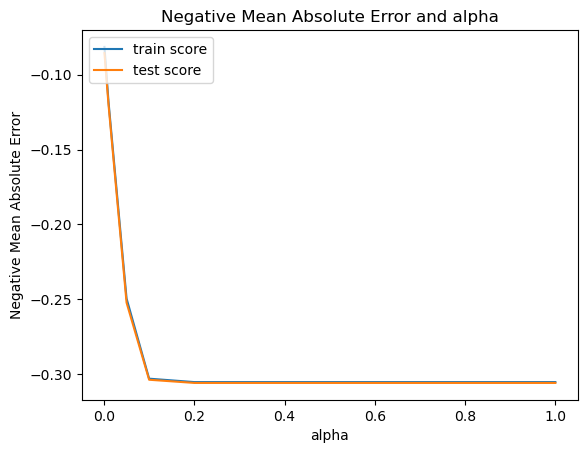

In [183]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [184]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [185]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [186]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.035574,0.013046,0.002079,0.000992,0.0001,{'alpha': 0.0001},-0.084198,-0.082951,-0.083971,-0.074725,...,-0.081533,0.003507,1,-0.071346,-0.072547,-0.070917,-0.075770,-0.072252,-0.072567,0.001707
1,0.007468,0.001886,0.002518,0.001718,0.001,{'alpha': 0.001},-0.086392,-0.089580,-0.092592,-0.073635,...,-0.085551,0.006458,2,-0.080569,-0.080675,-0.080050,-0.084624,-0.081021,-0.081388,0.001648
2,0.003309,0.000619,0.001305,0.000400,0.01,{'alpha': 0.01},-0.125966,-0.123983,-0.123519,-0.103619,...,-0.119949,0.008237,3,-0.119499,-0.117580,-0.117397,-0.119347,-0.116306,-0.118026,0.001222
3,0.003111,0.000480,0.001702,0.000397,0.05,{'alpha': 0.05},-0.259663,-0.246732,-0.254338,-0.227978,...,-0.252369,0.014932,4,-0.247134,-0.251566,-0.248868,-0.250457,-0.249964,-0.249598,0.001507
4,0.003308,0.001135,0.001811,0.000406,0.1,{'alpha': 0.1},-0.314645,-0.308787,-0.306159,-0.277179,...,-0.303902,0.013686,5,-0.302052,-0.304592,-0.303821,-0.306477,-0.299013,-0.303191,0.002526


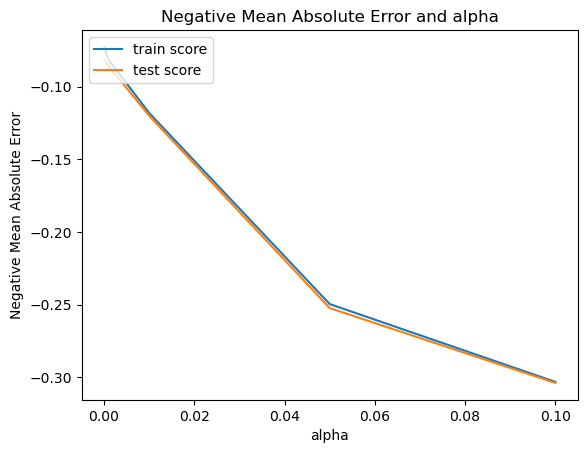

In [187]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [188]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001, 0.01, 0.05]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [189]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.069480,0.018239,0.001866,0.000848,0.00001,{'alpha': 1e-05},-0.087541,-0.082648,-0.084421,-0.073686,...,-0.081992,0.004609,2,-0.069090,-0.070560,-0.069207,-0.073751,-0.070078,-0.070537,0.001697
1,0.052720,0.017146,0.003154,0.001693,0.0001,{'alpha': 0.0001},-0.084198,-0.082951,-0.083971,-0.074725,...,-0.081533,0.003507,1,-0.071346,-0.072547,-0.070917,-0.075770,-0.072252,-0.072567,0.001707
2,0.005232,0.000254,0.001693,0.000591,0.001,{'alpha': 0.001},-0.086392,-0.089580,-0.092592,-0.073635,...,-0.085551,0.006458,3,-0.080569,-0.080675,-0.080050,-0.084624,-0.081021,-0.081388,0.001648
3,0.003906,0.000487,0.002005,0.000014,0.01,{'alpha': 0.01},-0.125966,-0.123983,-0.123519,-0.103619,...,-0.119949,0.008237,4,-0.119499,-0.117580,-0.117397,-0.119347,-0.116306,-0.118026,0.001222
4,0.002981,0.000634,0.002514,0.000316,0.05,{'alpha': 0.05},-0.259663,-0.246732,-0.254338,-0.227978,...,-0.252369,0.014932,5,-0.247134,-0.251566,-0.248868,-0.250457,-0.249964,-0.249598,0.001507


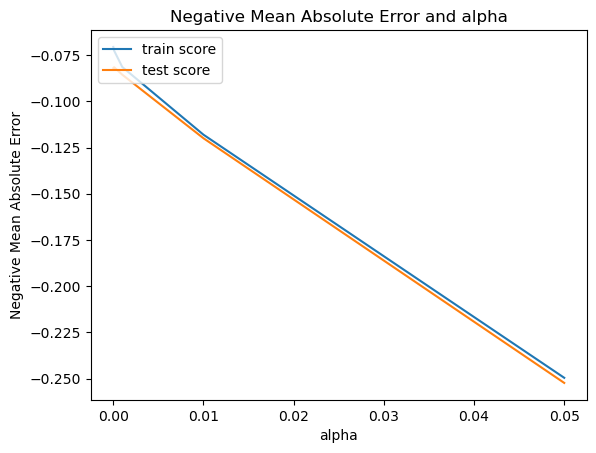

In [190]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [191]:

# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [192]:
# list of alphas to tune
params = {'alpha': [0.00001,0.0001, 0.001]}
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [193]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.066277,0.031646,0.003657,0.003043,0.00001,{'alpha': 1e-05},-0.087541,-0.082648,-0.084421,-0.073686,...,-0.081992,0.004609,2,-0.069090,-0.070560,-0.069207,-0.073751,-0.070078,-0.070537,0.001697
1,0.028603,0.007373,0.001853,0.000489,0.0001,{'alpha': 0.0001},-0.084198,-0.082951,-0.083971,-0.074725,...,-0.081533,0.003507,1,-0.071346,-0.072547,-0.070917,-0.075770,-0.072252,-0.072567,0.001707
2,0.005083,0.000734,0.001815,0.000411,0.001,{'alpha': 0.001},-0.086392,-0.089580,-0.092592,-0.073635,...,-0.085551,0.006458,3,-0.080569,-0.080675,-0.080050,-0.084624,-0.081021,-0.081388,0.001648


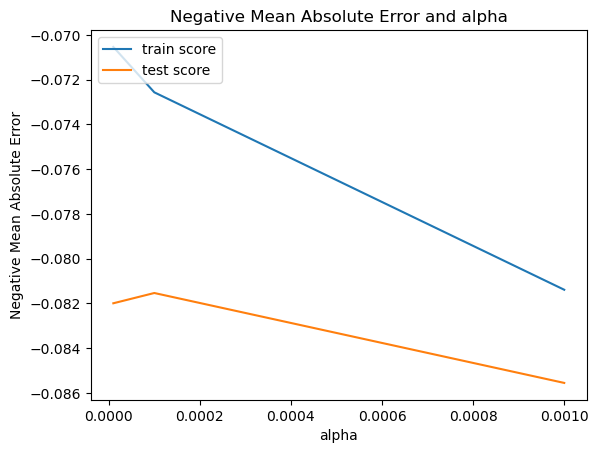

In [196]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [195]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

Building Lasso Regression model with optimal alpha value

In [197]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.9329094890291065
Lasso Regression test r2: 0.745485900023923


In [198]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_test.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

We are finding the absolute value of coefficient because negative coefficient is also as important as positive one and conveys that the variable is negatively related to the target variable Sale price ." 
For instance we just find the top 10 coefficents then 0.00 will be more important than a variable with -0.1 coefficent. but in reality the variable with -0.1 is more important to predict saleprice rather than 0.0 because 0.0 shows that that variable can be excluded and is insignificant where as -0.1 shows that the variable is needed to predict the Sale price. 

In [199]:
lasso_coef

,Feature,Coef,mod
0,LotFrontage,10.238169,10.238169
1,LotArea,0.133278,0.133278
2,OverallQual,0.510745,0.510745
3,OverallCond,0.472605,0.472605
4,ExterCond,0.214073,0.214073
...,...,...,...
95,SaleType_New,-0.048887,0.048887
96,SaleType_Oth,0.119125,0.119125
97,SaleCondition_Alloca,0.082365,0.082365
98,SaleCondition_Family,0.093770,0.093770


In [200]:
#selecting the top 10 variables
lasso_coef.sort_values(by='mod',ascending=False).head(10)

,Feature,Coef,mod
0,LotFrontage,10.238169,10.238169
15,BsmtFullBath,0.830643,0.830643
2,OverallQual,0.510745,0.510745
3,OverallCond,0.472605,0.472605
10,CentralAir,0.459843,0.459843
74,Exterior1st_CBlock,-0.420267,0.420267
35,MSZoning_RH,0.368736,0.368736
37,MSZoning_RM,0.299381,0.299381
38,Street_Pave,0.248485,0.248485
36,MSZoning_RL,0.238351,0.238351


In [201]:
lasso.coef_

array([ 1.33278104e-01,  5.10744551e-01,  4.72605174e-01,  2.14072764e-01,
       -4.19695554e-02,  5.96435042e-02,  1.55001566e-01,  4.08479369e-02,
       -0.00000000e+00,  4.59842591e-01,  8.61492495e-02,  0.00000000e+00,
        6.89377577e-02, -1.87865786e-02,  8.30643177e-01,  7.45267604e-02,
        6.21550250e-02,  5.66945908e-02, -1.19209560e-01,  7.80961310e-02,
        1.22979300e-01,  8.29336825e-02,  1.60177592e-01,  1.04835736e-01,
        1.71662580e-01, -2.74745947e-03,  5.51831618e-02, -7.85351198e-02,
       -8.41729548e-03, -3.45946464e-02, -4.45848353e-02, -9.27318657e-03,
       -8.45049328e-02, -3.21355291e-02,  3.68735959e-01,  2.38350876e-01,
        2.99381359e-01,  2.48485324e-01,  6.29374203e-02, -0.00000000e+00,
       -5.51661651e-02, -8.11936365e-02,  1.04948902e-01, -3.82027542e-02,
       -1.16977962e-01,  4.91680883e-02, -6.22371199e-02,  1.03604089e-01,
        8.15642388e-02, -7.47495900e-02,  5.47361003e-02,  1.23441222e-02,
        0.00000000e+00,  

We will make use of Lasso Regression model because it is using less numbers of variables and giving almost the same accurate. Its more efficient model than Ridge regression model

In [202]:
# We have used lasso for building the modle as we got the optimal value of alpha.
lasso = Lasso(alpha = 0.0001)
lasso.fit(X_train,y_train)
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true = y_train,y_pred = y_train_pred))
print(r2_score(y_true = y_test,y_pred = y_test_pred))

0.9329094890291065
0.745485900023923


## Model Inference and Conclusion
### The company wants to know:

<p>Which variables are significant in predicting the price of a house:
    
- LotFrontage :  If the Linear feet of street connected to property area increases then the Price increase
    
- BsmtFullBath	: :  If the BsmtFullBath area is more the SalePrice is higher
    
- Overall Condition: If the Overall Condition is Excellent the SalePrice is higher
    
- MSZoning_RH : If the house is near residential area then the SalePrice is higher
    
- Overall quality: If the Overall quality is Excellent the SalePrice is higher
    
- Exterior1st_CBlock : If the house Exterior is CBlock then price is less
    
- Garage Area: If the Garage Area is more the SalePrice is higher
    
- CentralAir: If the CentralAir is Yes the SalePrice is higher

   
<p>How well those variables describe the price of a house.
    
- These variables tells about the linear relation with respect to the price by which the company can improve their sales. For instance they can concentrate in investing in properties which may have high SalePrice in future

In [203]:
X_train_new = X_train.drop(['LotFrontage','BsmtFullBath','OverallCond','CentralAir','OverallQual'],axis=1)
X_test_new = X_test.drop(['LotFrontage','BsmtFullBath','OverallCond','CentralAir','OverallQual'],axis=1)

X_test_new.head()
X_train_new.shape

(988, 95)

In [204]:
X_test_new.shape

(424, 95)

In [205]:
lasso_modified = Lasso()
param = {'alpha': [0.0001, 0.001, 0.01]}
folds = 5
# cross validation
lasso_cv_model_modified = GridSearchCV(estimator = lasso, 
                        param_grid = param, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv_model_modified.fit(X_train_new, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001),
             param_grid={'alpha': [0.0001, 0.001, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [206]:

#Creating the results dataframe.
lasso_cv_modified_results = pd.DataFrame(lasso_cv_model_modified.cv_results_)
#reading the results
lasso_cv_modified_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.040432,0.013831,0.002621,0.001783,0.0001,{'alpha': 0.0001},-0.098705,-0.092124,-0.091474,-0.085312,...,-0.091153,0.004499,1,-0.078379,-0.080558,-0.079557,-0.083373,-0.080409,-0.080455,0.001652
1,0.007629,0.003290,0.004558,0.005088,0.001,{'alpha': 0.001},-0.102983,-0.103128,-0.099190,-0.081570,...,-0.096415,0.007972,2,-0.088864,-0.090609,-0.090278,-0.093827,-0.090790,-0.090874,0.001624
2,0.002973,0.000174,0.001062,0.000698,0.01,{'alpha': 0.01},-0.134446,-0.133134,-0.130610,-0.112384,...,-0.127890,0.007991,3,-0.126429,-0.124740,-0.125291,-0.128232,-0.125097,-0.125958,0.001270


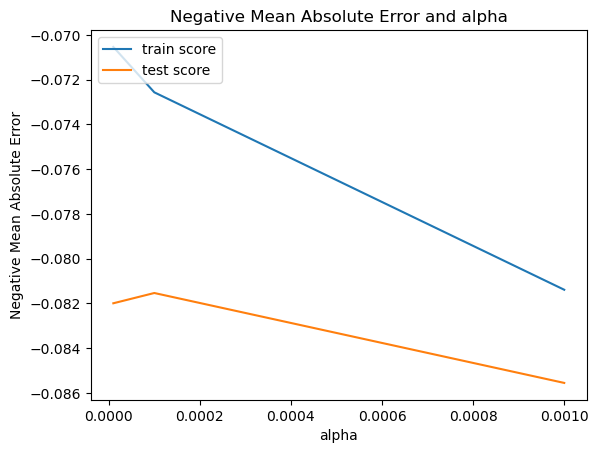

In [207]:
# plotting mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [208]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.0001}

In [209]:
# After performing grid search we found the same alpha that ue use before
lasso = Lasso(alpha=0.0001)
lasso.fit(X_train_new,y_train)

y_train_pred = lasso.predict(X_train_new)
y_test_pred = lasso.predict(X_test_new)

print("Lasso Regression train r2:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("Lasso Regression test r2:",r2_score(y_true=y_test,y_pred=y_test_pred))

Lasso Regression train r2: 0.919288442030606
Lasso Regression test r2: 0.7213466009698328


In [210]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = X_train_new.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param,(abs(ele) for ele in model_param))))
lasso_coef.columns = ['Feature','Coef','mod']

In [211]:
#selecting the top 5 variables
lasso_coef.sort_values(by='mod',ascending=False).head(5)

,Feature,Coef,mod
0,LotArea,10.368235,10.368235
11,FullBath,0.941232,0.941232
1,ExterCond,0.574185,0.574185
7,1stFlrSF,0.499576,0.499576
30,MSZoning_RH,0.488595,0.488595
